In [2]:
import seaborn as sns
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import statsmodels.graphics.gofplots as sgg
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.arima_model import ARIMA
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from scipy.special import inv_boxcox 
import tensorflow as tf
keras = tf.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from math import e
from Plot_Series_Difference import plot_series_and_difference
from LSTM_Windowize import windowize_data
from Coinbase_Data import fetch_daily_data
from Bitcoin_Tool import BTC_assist_tool
%matplotlib inline
plt.style.use('ggplot')

/home/jonathon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jonathon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jonathon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jonathon/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [3]:
df_btc = pd.read_csv('data/BTC-USD.csv', header = 0)

In [4]:
df_bch = pd.read_csv('data/BCH-USD.csv', header = 0)

In [5]:
df_bnb = pd.read_csv('data/BNB-USD.csv', header = 0)

In [6]:
df_bsv = pd.read_csv('data/BSV-USD.csv', header = 0)

In [7]:
df_eos = pd.read_csv('data/EOS-USD.csv', header = 0)

In [8]:
df_eth = pd.read_csv('data/ETH-USD.csv', header = 0)

In [9]:
df_ltc = pd.read_csv('data/LTC-USD.csv', header = 0)

In [10]:
df_xrp = pd.read_csv('data/XRP-USD.csv', header = 0)

In [11]:
df_xtz = pd.read_csv('data/XTZ-USD.csv', header = 0)

In [12]:
#investigate/inspect df_btc
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2309 non-null   object 
 1   Open       2309 non-null   float64
 2   High       2309 non-null   float64
 3   Low        2309 non-null   float64
 4   Close      2309 non-null   float64
 5   Adj Close  2309 non-null   float64
 6   Volume     2309 non-null   float64
dtypes: float64(6), object(1)
memory usage: 126.4+ KB


In [13]:
df_btc.describe()

Open          High           Low         Close     Adj Close  \
count   2309.000000   2309.000000   2309.000000   2309.000000   2309.000000   
mean    5065.654267   5199.395167   4929.140522   5080.786485   5080.786485   
std     5232.208409   5409.553385   5048.792930   5269.664907   5269.664907   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      446.710999    451.937988    441.705994    446.721985    446.721985   
50%     3903.758301   3969.889893   3836.905762   3906.717285   3906.717285   
75%     8504.410156   8691.540039   8244.540039   8510.379883   8510.379883   
max    40788.640630  41946.738280  38980.875000  40797.609380  40797.609380   

             Volume  
count  2.309000e+03  
mean   9.423939e+09  
std    1.366391e+10  
min    5.914570e+06  
25%    6.345470e+07  
50%    3.259740e+09  
75%    1.582195e+10  
max    1.233210e+11

In [14]:
df_btc.head()

Date        Open        High         Low       Close   Adj Close  \
0  9/17/2014  465.864014  468.174011  452.421997  457.334015  457.334015   
1  9/18/2014  456.859985  456.859985  413.104004  424.440002  424.440002   
2  9/19/2014  424.102997  427.834991  384.532013  394.795990  394.795990   
3  9/20/2014  394.673004  423.295990  389.882996  408.903992  408.903992   
4  9/21/2014  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume  
0  21056800.0  
1  34483200.0  
2  37919700.0  
3  36863600.0  
4  26580100.0

In [15]:
df_btc.tail()

Date         Open         High          Low        Close  \
2304   1/7/2021  36833.87500  40180.36719  36491.19141  39371.04297   
2305   1/8/2021  39381.76563  41946.73828  36838.63672  40797.60938   
2306   1/9/2021  40788.64063  41436.35156  38980.87500  40254.54688   
2307  1/10/2021  40254.21875  41420.19141  35984.62891  38356.44141   
2308  1/11/2021  38346.53125  38346.53125  30549.59961  35566.65625   

        Adj Close        Volume  
2304  39371.04297  8.476214e+10  
2305  40797.60938  8.810752e+10  
2306  40254.54688  6.198416e+10  
2307  38356.44141  7.998075e+10  
2308  35566.65625  1.233210e+11

[]

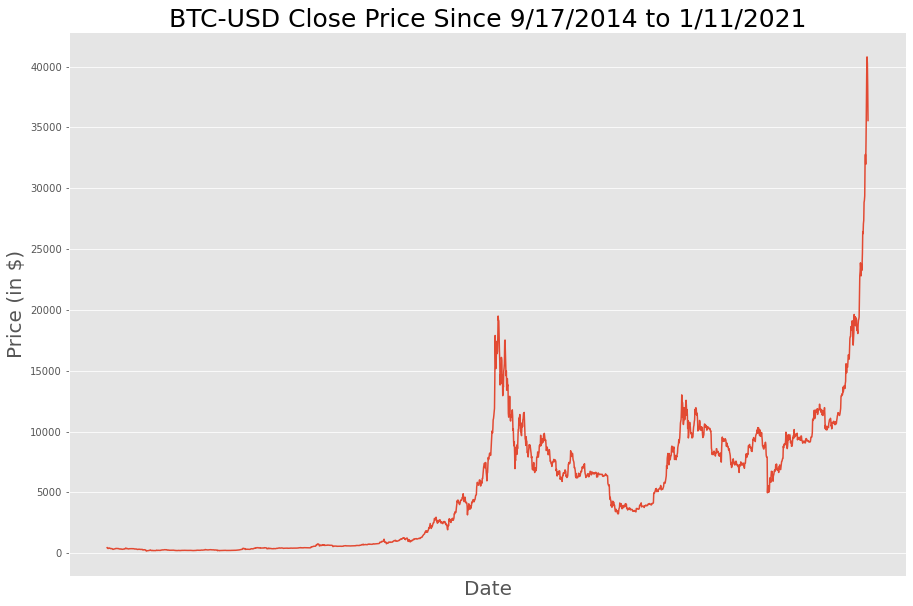

In [16]:
#plot BTC-USD 'Close' price over its' lifetime
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_btc['Date'], df_btc['Close'])
end_date = df_btc['Date'][(len(df_btc)-1)]
init_date = df_btc['Date'][0]
ax.set_title(f'BTC-USD Close Price Since {init_date} to {end_date}', fontsize = 25) 
ax.set_xlabel('Date', fontsize = 20) 
ax.set_ylabel('Price (in $)', fontsize = 20)
ax.set_xticks([])

In [17]:
df_btc['Volume_Price'] = df_btc['Close'] * df_btc['Volume'] 
#Volume_Price is the product of Volume and Price 
#for a specific date

In [18]:
df_btc['10_Day_VWAP'] = float('NaN')

In [19]:
for i in range(10, len(df_btc) + 1):
    df_btc['10_Day_VWAP'][i-1] = np.sum(df_btc['Volume_Price'][i-10:i])/np.sum(df_btc['Volume'][i-10:i])
#10-day VWAP is the sum of Volume*Price for each specific day 
#for the past 10 days divided by the 
#sum of Volume for the past 10 days

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_btc['Daily_Return'] = float('NaN')

In [21]:
for i in range(1, len(df_btc)):
    df_btc['Daily_Return'][i] = df_btc['Close'][i]/df_btc['Close'][i-1] - 1
#Daily Return is the percent gain/loss each day 
#compared to the previous day

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_btc['Biweekly_RS'] = float('NaN')

In [23]:
df_btc['Biweekly_RSI'] = float('NaN')

In [24]:
for i in range(13, len(df_btc)):
    daily_gain = 0
    daily_loss = 0
    for j in range(i-13, i+1):
        if df_btc['Daily_Return'][j] >= 0:
            daily_gain += df_btc['Daily_Return'][j]
        else:
            daily_loss += np.abs(df_btc['Daily_Return'][j])
    df_btc['Biweekly_RS'][i] = daily_gain/daily_loss
    daily_gain = 0
    daily_loss = 0
#RS = (Average of Upward Price Change/Average of Downward Price Change)
#the absolute value of the downward price change is applied 
#to the Average of the Downward Price Change 
#to ensure a positive value for RS always

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
for i in range(13, len(df_btc)):
    df_btc['Biweekly_RSI'][i] = 100 - (100/(1 + df_btc['Biweekly_RS'][i]))
#RSI = 100 – [100/(1 + RS)]
#for Biweekly RSI, the past 14 days are taken into account
#the absolute value of the downward price change is applied 
#to the Average of the Downward Price Change

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df_btc['12_day_EMA'] = float('NaN')
df_btc['26_day_EMA'] = float('NaN')

In [27]:
for i in range(25, len(df_btc)):
    k_12 = 2/(12+1)
    k_26 = 2/(26+1)
    if i == 25:
        df_btc['12_day_EMA'][i] = np.sum(df_btc['Close'][i-11:i+1])/12
        df_btc['26_day_EMA'][i] = np.sum(df_btc['Close'][i-25:i+1])/26
    else:
        df_btc['12_day_EMA'][i] = df_btc['Close'][i] * k_12 + df_btc['12_day_EMA'][i-1] * (1 - k_12)
        df_btc['26_day_EMA'][i] = df_btc['Close'][i] * k_26 + df_btc['12_day_EMA'][i-1] * (1 - k_26)
#12-day EMA - 26-day EMA = MACD
#After calculating basic 12-day MA and 26-day MA for 
#initial calculations, 
#subsequent calculations of EMA consist of 
#Price(today) * k + EMA(yesterday) * (1 - k), 
#with k = 2/(N + 1) and N = # of days in EMA = 12
#For 26-day EMA, N = 26 instead

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykerne

In [28]:
df_btc['MACD'] = df_btc['12_day_EMA'] - df_btc['26_day_EMA']
#Moving Average Convergence/Divergence is simply the 
#difference between the 12-day EMA and 26-day EMA

In [29]:
df_btc['Signal'] = float('NaN')

In [30]:
for i in range(33, len(df_btc)):
    k_9 = 2/(9+1)
    if i == 33:
        df_btc['Signal'][i] = np.sum(df_btc['MACD'][i-8:i+1])/9
    else:
        df_btc['Signal'][i] = df_btc['MACD'][i] * k_9 + df_btc['MACD'][i-1] * (1 - k_9)
#Signal line is 9-day EMA
#the initial Signal line calculation is a
#simple moving average (SMA) for past 9 days

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df_btc['Trend_Analysis_Close'] = float('NaN')

In [32]:
for i in range(3, len(df_btc)):
    if df_btc['Close'][i] > df_btc['Close'][i-2] and df_btc['Close'][i-1] > df_btc['Close'][i-3]:
        df_btc['Trend_Analysis_Close'][i] = 'UPTREND'
    elif df_btc['Close'][i] < df_btc['Close'][i-2] and df_btc['Close'][i-1] < df_btc['Close'][i-3]:
        df_btc['Trend_Analysis_Close'][i] = 'DOWNTREND'
    else:
        df_btc['Trend_Analysis_Close'][i] = 'N/A'
#simple trend analysis of just Close price

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jonathon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home

In [33]:
#further inspection of df's in preparation for first model
len(df_btc)

2309

In [34]:
df_bch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1269 non-null   object 
 1   Open       1269 non-null   float64
 2   High       1269 non-null   float64
 3   Low        1269 non-null   float64
 4   Close      1269 non-null   float64
 5   Adj Close  1269 non-null   float64
 6   Volume     1269 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.5+ KB


In [35]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1267 non-null   object 
 1   Open       1267 non-null   float64
 2   High       1267 non-null   float64
 3   Low        1267 non-null   float64
 4   Close      1267 non-null   float64
 5   Adj Close  1267 non-null   float64
 6   Volume     1267 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.4+ KB


In [36]:
df_bsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       220 non-null    float64
 2   High       220 non-null    float64
 3   Low        220 non-null    float64
 4   Close      220 non-null    float64
 5   Adj Close  220 non-null    float64
 6   Volume     220 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [37]:
df_eos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1291 non-null   object 
 1   Open       1291 non-null   float64
 2   High       1291 non-null   float64
 3   Low        1291 non-null   float64
 4   Close      1291 non-null   float64
 5   Adj Close  1291 non-null   float64
 6   Volume     1291 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 70.7+ KB


In [38]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1985 non-null   object 
 1   Open       1985 non-null   float64
 2   High       1985 non-null   float64
 3   Low        1985 non-null   float64
 4   Close      1985 non-null   float64
 5   Adj Close  1985 non-null   float64
 6   Volume     1985 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.7+ KB


In [39]:
df_ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2309 non-null   object 
 1   Open       2309 non-null   float64
 2   High       2309 non-null   float64
 3   Low        2309 non-null   float64
 4   Close      2309 non-null   float64
 5   Adj Close  2309 non-null   float64
 6   Volume     2309 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.4+ KB


In [40]:
df_xrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2309 non-null   object 
 1   Open       2309 non-null   float64
 2   High       2309 non-null   float64
 3   Low        2309 non-null   float64
 4   Close      2309 non-null   float64
 5   Adj Close  2309 non-null   float64
 6   Volume     2309 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.4+ KB


In [41]:
df_xtz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       237 non-null    float64
 2   High       237 non-null    float64
 3   Low        237 non-null    float64
 4   Close      237 non-null    float64
 5   Adj Close  237 non-null    float64
 6   Volume     237 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [42]:
df_btc['Date'] = pd.to_datetime(df_btc['Date'], infer_datetime_format = True)

In [43]:
df_bch['Date'] = pd.to_datetime(df_bch['Date'], infer_datetime_format = True)

In [44]:
df_bnb['Date'] = pd.to_datetime(df_bnb['Date'], infer_datetime_format = True)

In [45]:
df_bsv['Date'] = pd.to_datetime(df_bsv['Date'], infer_datetime_format = True)

In [46]:
df_eos['Date'] = pd.to_datetime(df_eos['Date'], infer_datetime_format = True)

In [47]:
df_eth['Date'] = pd.to_datetime(df_eth['Date'], infer_datetime_format = True)

In [48]:
df_ltc['Date'] = pd.to_datetime(df_ltc['Date'], infer_datetime_format = True)

In [49]:
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'], infer_datetime_format = True)

In [50]:
df_xtz['Date'] = pd.to_datetime(df_xtz['Date'], infer_datetime_format = True)

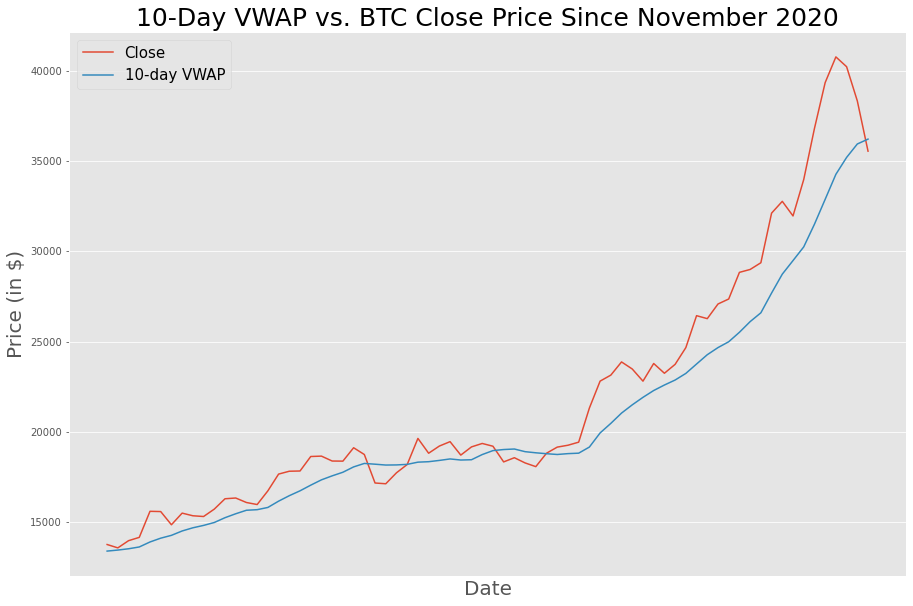

In [51]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], df_btc[df_btc['Date'] >= '2020-11-01']['Close'], label = 'Close')
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], df_btc[df_btc['Date'] >= '2020-11-01']['10_Day_VWAP'], label = '10-day VWAP')
ax.set_title('10-Day VWAP vs. BTC Close Price Since November 2020', fontsize = 25) 
ax.set_xlabel('Date', fontsize = 20) 
ax.set_ylabel('Price (in $)', fontsize = 20)
ax.set_xticks([])
ax.legend(fontsize = 15)

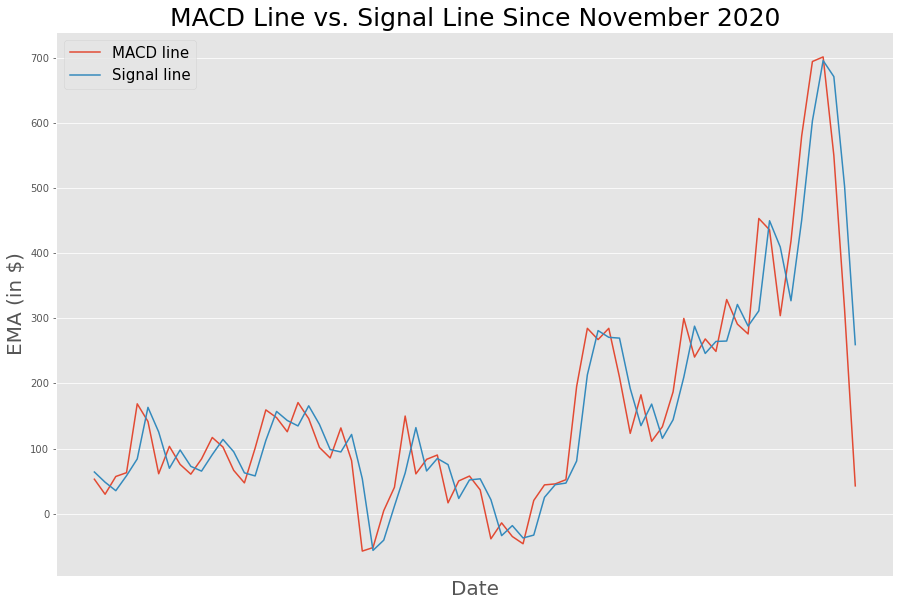

In [52]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], df_btc[df_btc['Date'] >= '2020-11-01']['MACD'], label = 'MACD line')
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], df_btc[df_btc['Date'] >= '2020-11-01']['Signal'], label = 'Signal line')
ax.set_title('MACD Line vs. Signal Line Since November 2020', fontsize = 25) 
ax.set_xlabel('Date', fontsize = 20) 
ax.set_ylabel('EMA (in $)', fontsize = 20)
ax.set_xticks([])
ax.legend(fontsize = 15)

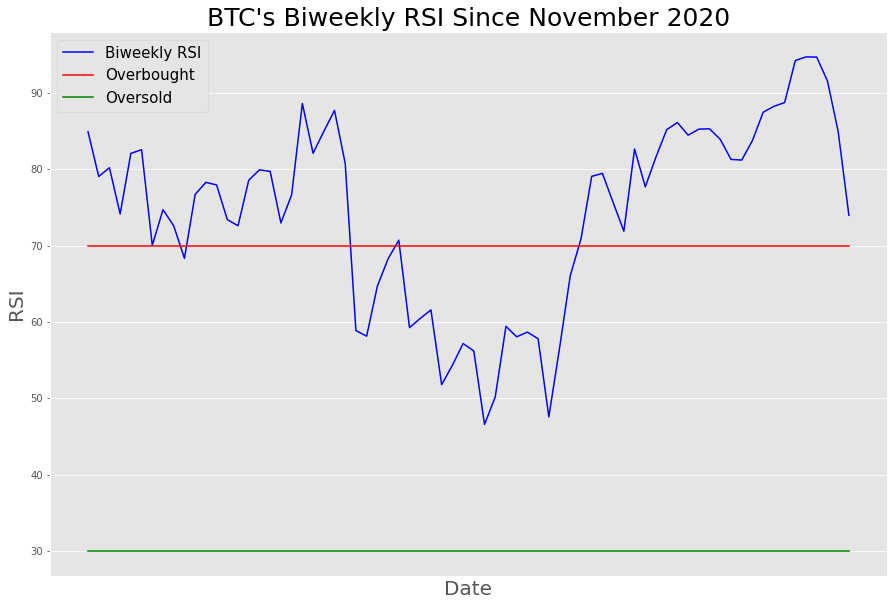

In [53]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], df_btc[df_btc['Date'] >= '2020-11-01']['Biweekly_RSI'], label = 'Biweekly RSI', color = 'blue')
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], [70] * len(df_btc[df_btc['Date'] >= '2020-11-01']), color = 'red', label = 'Overbought')
ax.plot(df_btc[df_btc['Date'] >= '2020-11-01']['Date'], [30] * len(df_btc[df_btc['Date'] >= '2020-11-01']), color = 'green', label = 'Oversold')
ax.set_title('BTC\'s Biweekly RSI Since November 2020', fontsize = 25) 
ax.set_xlabel('Date', fontsize = 20) 
ax.set_ylabel('RSI', fontsize = 20)
ax.set_xticks([])
ax.legend(fontsize = 15)

In [54]:
df_hist = df_btc[df_btc['Date'] >= '2020-02-01'][['Date', 'Daily_Return']]

In [55]:
max_df = df_hist['Daily_Return'].max()

In [56]:
min_df = df_hist['Daily_Return'].min()

In [57]:
bins = int((max_df - min_df)/0.01)

In [58]:
df_hist['Daily_Return_Perc'] = df_hist['Daily_Return'] * 100

Text(0, 0.5, 'Count')

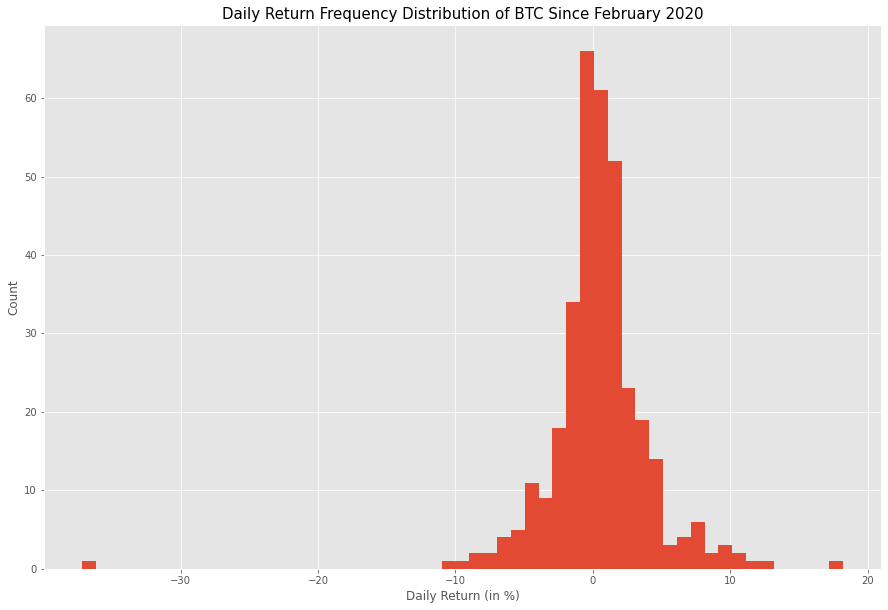

In [59]:
df_hist.hist(column = 'Daily_Return_Perc', bins = bins, figsize = (15, 10))
plt.title('Daily Return Frequency Distribution of BTC Since February 2020', fontsize = 15)
plt.xlabel('Daily Return (in %)')
plt.ylabel('Count')

In [60]:
len(df_hist)

346

In [61]:
#at 99% confidence, 3rd value in from greatest loss; at 95% confidence, 17th value in from greatest loss

In [62]:
df_hist.sort_values('Daily_Return_Perc').head(17)

Date  Daily_Return  Daily_Return_Perc
2003 2020-03-12     -0.371695         -37.169539
2178 2020-09-03     -0.102395         -10.239476
1999 2020-03-08     -0.089993          -8.999349
2062 2020-05-10     -0.087292          -8.729152
2262 2020-11-26     -0.084427          -8.442707
2308 2021-01-11     -0.072733          -7.273316
2007 2020-03-16     -0.070069          -7.006916
2005 2020-03-14     -0.065306          -6.530553
2085 2020-06-02     -0.062698          -6.269775
2146 2020-08-02     -0.060034          -6.003427
2032 2020-04-10     -0.059791          -5.979058
2013 2020-03-22     -0.057366          -5.736584
1988 2020-02-26     -0.055791          -5.579095
2094 2020-06-11     -0.055553          -5.555301
2020 2020-03-29     -0.051288          -5.128820
1981 2020-02-19     -0.050149          -5.014884
2307 2021-01-10     -0.047153          -4.715257

In [63]:
#Historical VaR
# -9% to -10% loss at 99% confidence, -4% to -5% at 95% confidence based on this time interval from February 1, 2020

In [64]:
df_btc.set_index('Date', drop = True, inplace = True)
df_bch.set_index('Date', drop = True, inplace = True)
df_bnb.set_index('Date', drop = True, inplace = True)
df_bsv.set_index('Date', drop = True, inplace = True)
df_eos.set_index('Date', drop = True, inplace = True)
df_eth.set_index('Date', drop = True, inplace = True)
df_ltc.set_index('Date', drop = True, inplace = True)
df_xrp.set_index('Date', drop = True, inplace = True)
df_xtz.set_index('Date', drop = True, inplace = True)

In [65]:
df_corr = pd.concat([df_btc['Close'], df_bch['Close'], df_bnb['Close'], df_bsv['Close'], 
                     df_eos['Close'], df_eth['Close'], df_ltc['Close'], df_xrp['Close'], df_xtz['Close']], 
                     keys = ['Close_BTC', 'Close_BCH', 'Close_BNB', 'Close_BSV', 'Close_EOS', 'Close_ETH', 'Close_LTC', 
                              'Close_XRP', 'Close_XTZ'], axis = 1)

In [66]:
df_corr[['Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']] = float('NaN')

In [67]:
#incorporate time lag to enable predicting following day
#of BTC-USD Close Price
for i in range(1, len(df_corr)):
    df_corr['Close_BCH_lag_1'][i] = df_corr['Close_BCH'][i-1]
    df_corr['Close_BNB_lag_1'][i] = df_corr['Close_BNB'][i-1]
    df_corr['Close_BSV_lag_1'][i] = df_corr['Close_BSV'][i-1]
    df_corr['Close_EOS_lag_1'][i] = df_corr['Close_EOS'][i-1]
    df_corr['Close_ETH_lag_1'][i] = df_corr['Close_ETH'][i-1]
    df_corr['Close_LTC_lag_1'][i] = df_corr['Close_LTC'][i-1]
    df_corr['Close_XRP_lag_1'][i] = df_corr['Close_XRP'][i-1]
    df_corr['Close_XTZ_lag_1'][i] = df_corr['Close_XTZ'][i-1]

In [68]:
corrMatrix = df_corr[['Close_BTC', 'Close_BCH', 'Close_BNB', 'Close_BSV', 'Close_EOS', 'Close_ETH', 'Close_LTC', 'Close_XRP', 'Close_XTZ']].corr()

<AxesSubplot:>

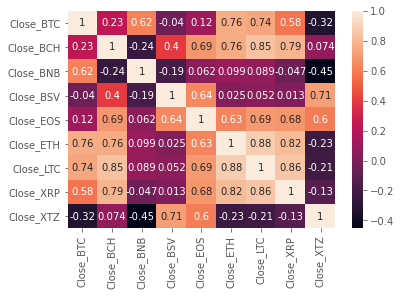

In [69]:
sns.heatmap(corrMatrix, annot=True)
#same-day correlation over all cryptocurrency lifetimes

In [70]:
corrMatrix = df_corr[['Close_BTC', 'Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']].corr()

<AxesSubplot:>

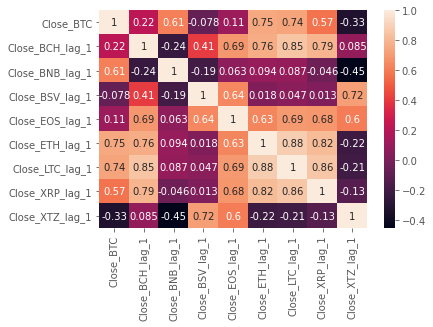

In [71]:
#time-lagged correlation of cryptocurrencies vs. 
#non-time-lagged BTC-USD 
sns.heatmap(corrMatrix, annot=True)

In [72]:
df_corr_time_lag = df_corr[['Close_BTC', 'Close_BCH_lag_1', 'Close_BNB_lag_1', 'Close_BSV_lag_1', 'Close_EOS_lag_1', 'Close_ETH_lag_1', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_XTZ_lag_1']]

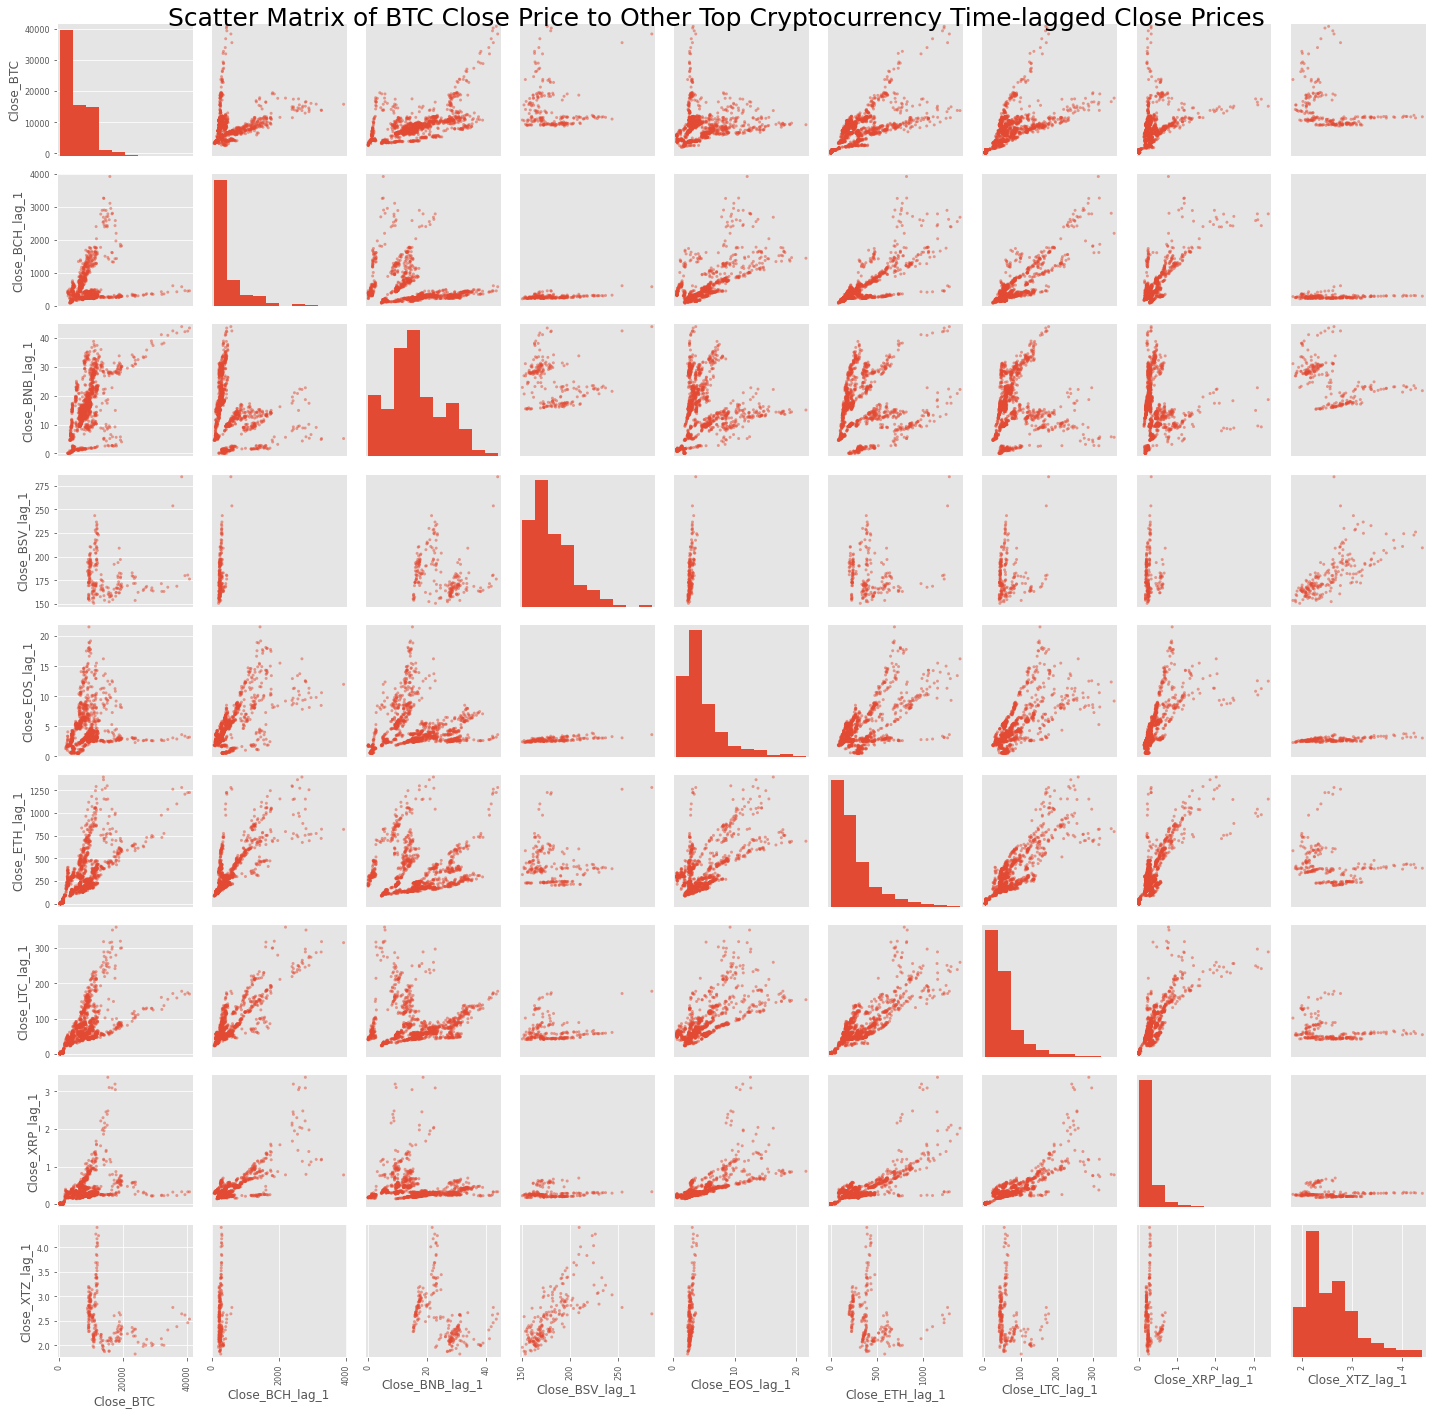

In [73]:
pd.plotting.scatter_matrix(df_corr_time_lag, figsize = (20,20))
plt.suptitle('Scatter Matrix of BTC Close Price to Other Top Cryptocurrency Time-lagged Close Prices', fontsize = 25)
plt.tight_layout()

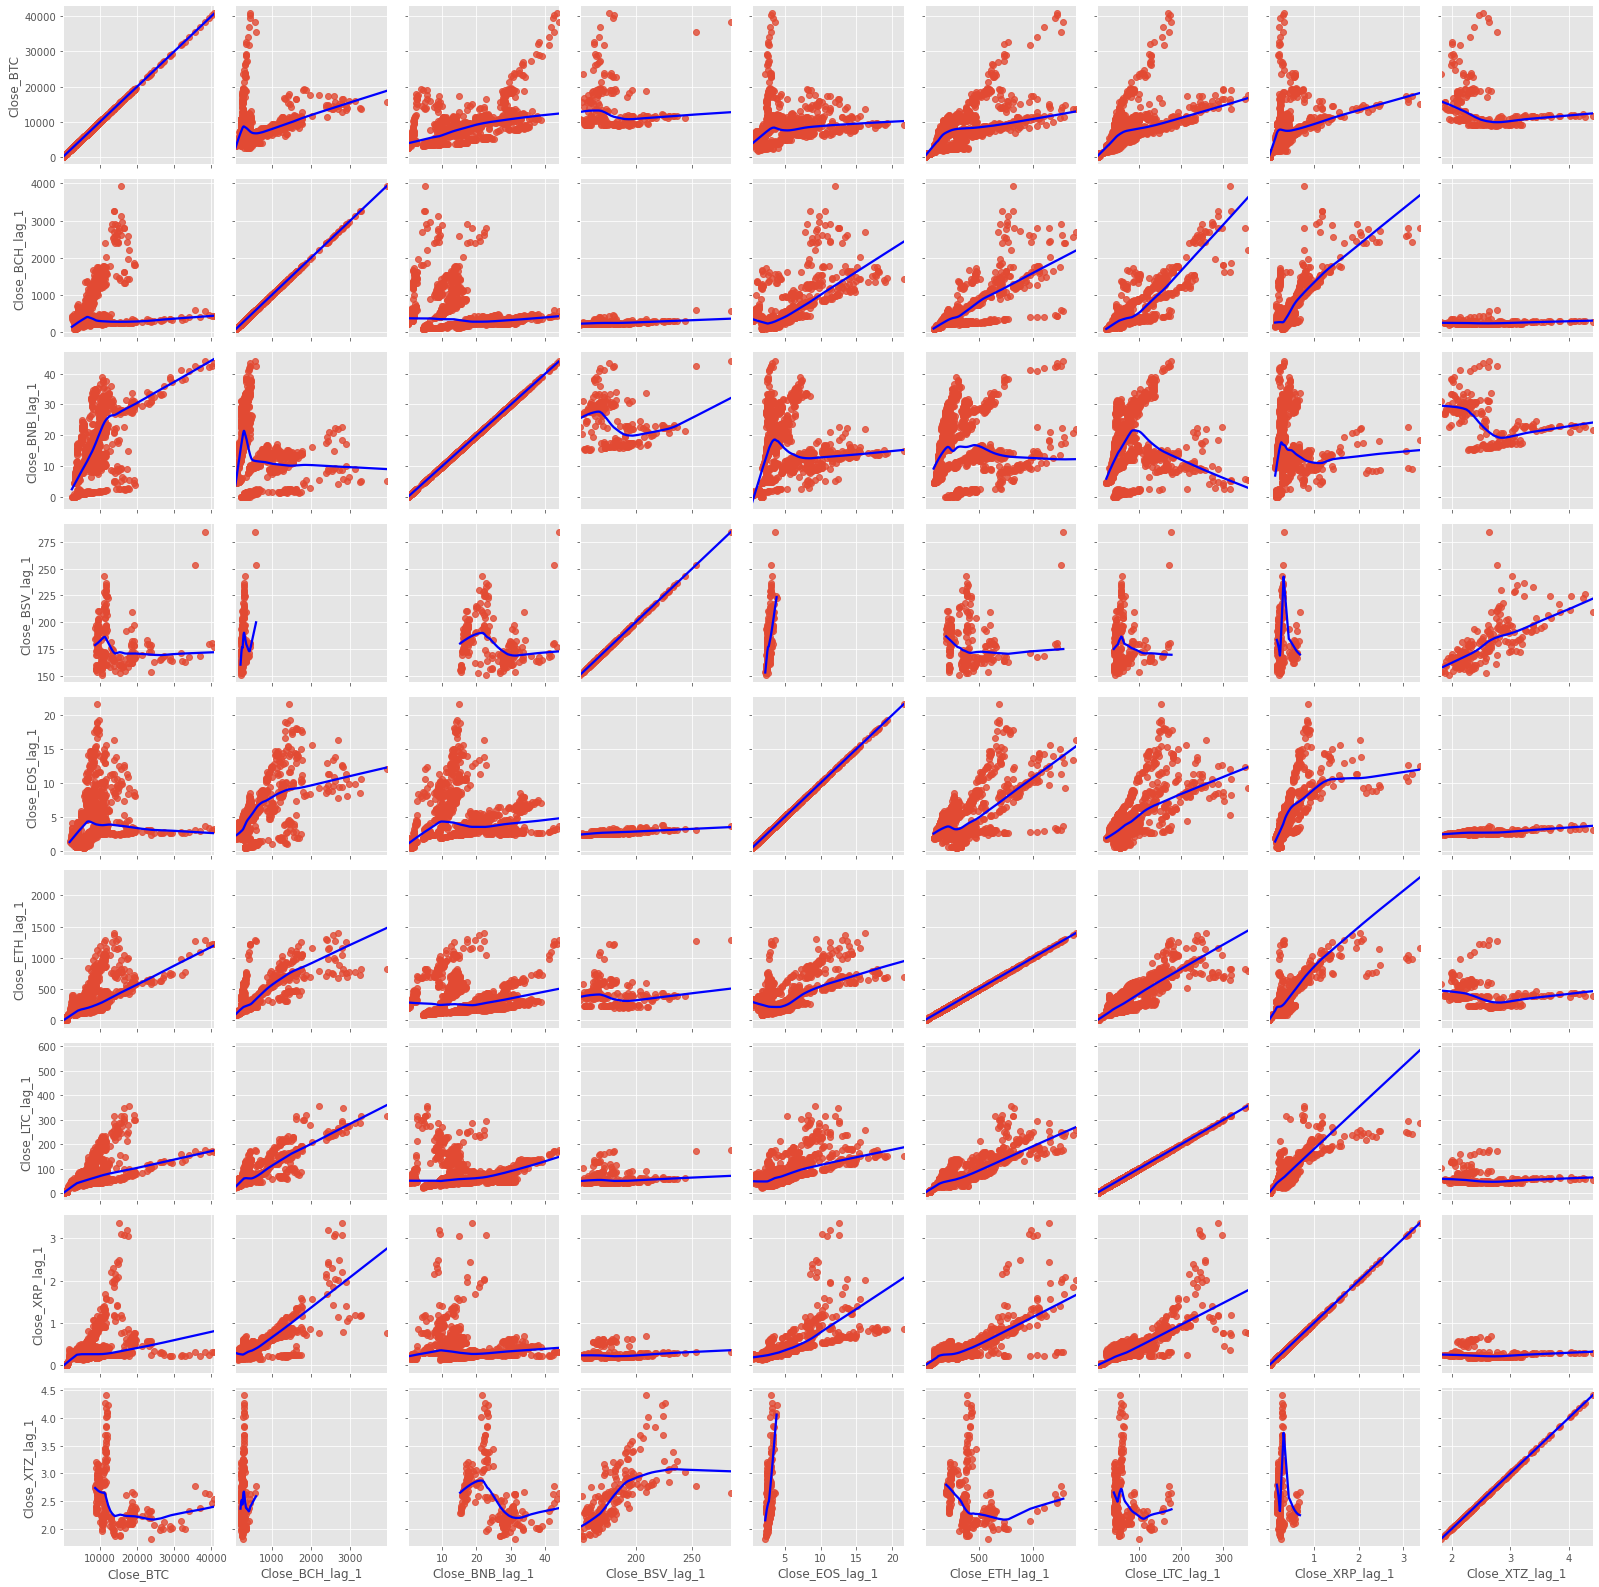

In [74]:
grids = sns.PairGrid(df_corr_time_lag)
grids = grids.map(sns.regplot, lowess=True, scatter = True, line_kws={'color': 'blue'})

In [75]:
#df.corr is NaN tolerant, so no need to account 
#for removing NaN's
df_corr_time_lag.corr()['Close_BTC']

Close_BTC          1.000000
Close_BCH_lag_1    0.223102
Close_BNB_lag_1    0.612591
Close_BSV_lag_1   -0.078393
Close_EOS_lag_1    0.110784
Close_ETH_lag_1    0.754791
Close_LTC_lag_1    0.737448
Close_XRP_lag_1    0.572889
Close_XTZ_lag_1   -0.329447
Name: Close_BTC, dtype: float64

In [76]:
#highest correlation of BTC Close Price among ETH, LTC, XRP,
#and BNB; will test for multicollinearity in subsequent
#time series model via VIF score, if VIF > 5, 
#multicollinearity exists!
#these correlations consider all available data!!!

In [77]:
#However, for linear trend/seasonal time series model, 
#upward linear trend initiates in March, 2020
#However, correlation from February, 2020 to Present 
#will be considered to add to first model

In [78]:
df_corr_baseline = df_corr_time_lag[df_corr_time_lag.index >= '2020-02-01']

In [79]:
corrMatrix_baseline = df_corr_baseline.corr()

<AxesSubplot:>

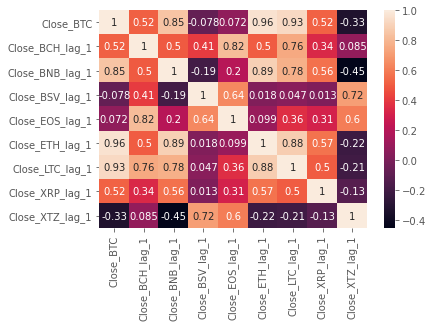

In [80]:
sns.heatmap(corrMatrix_baseline, annot=True)

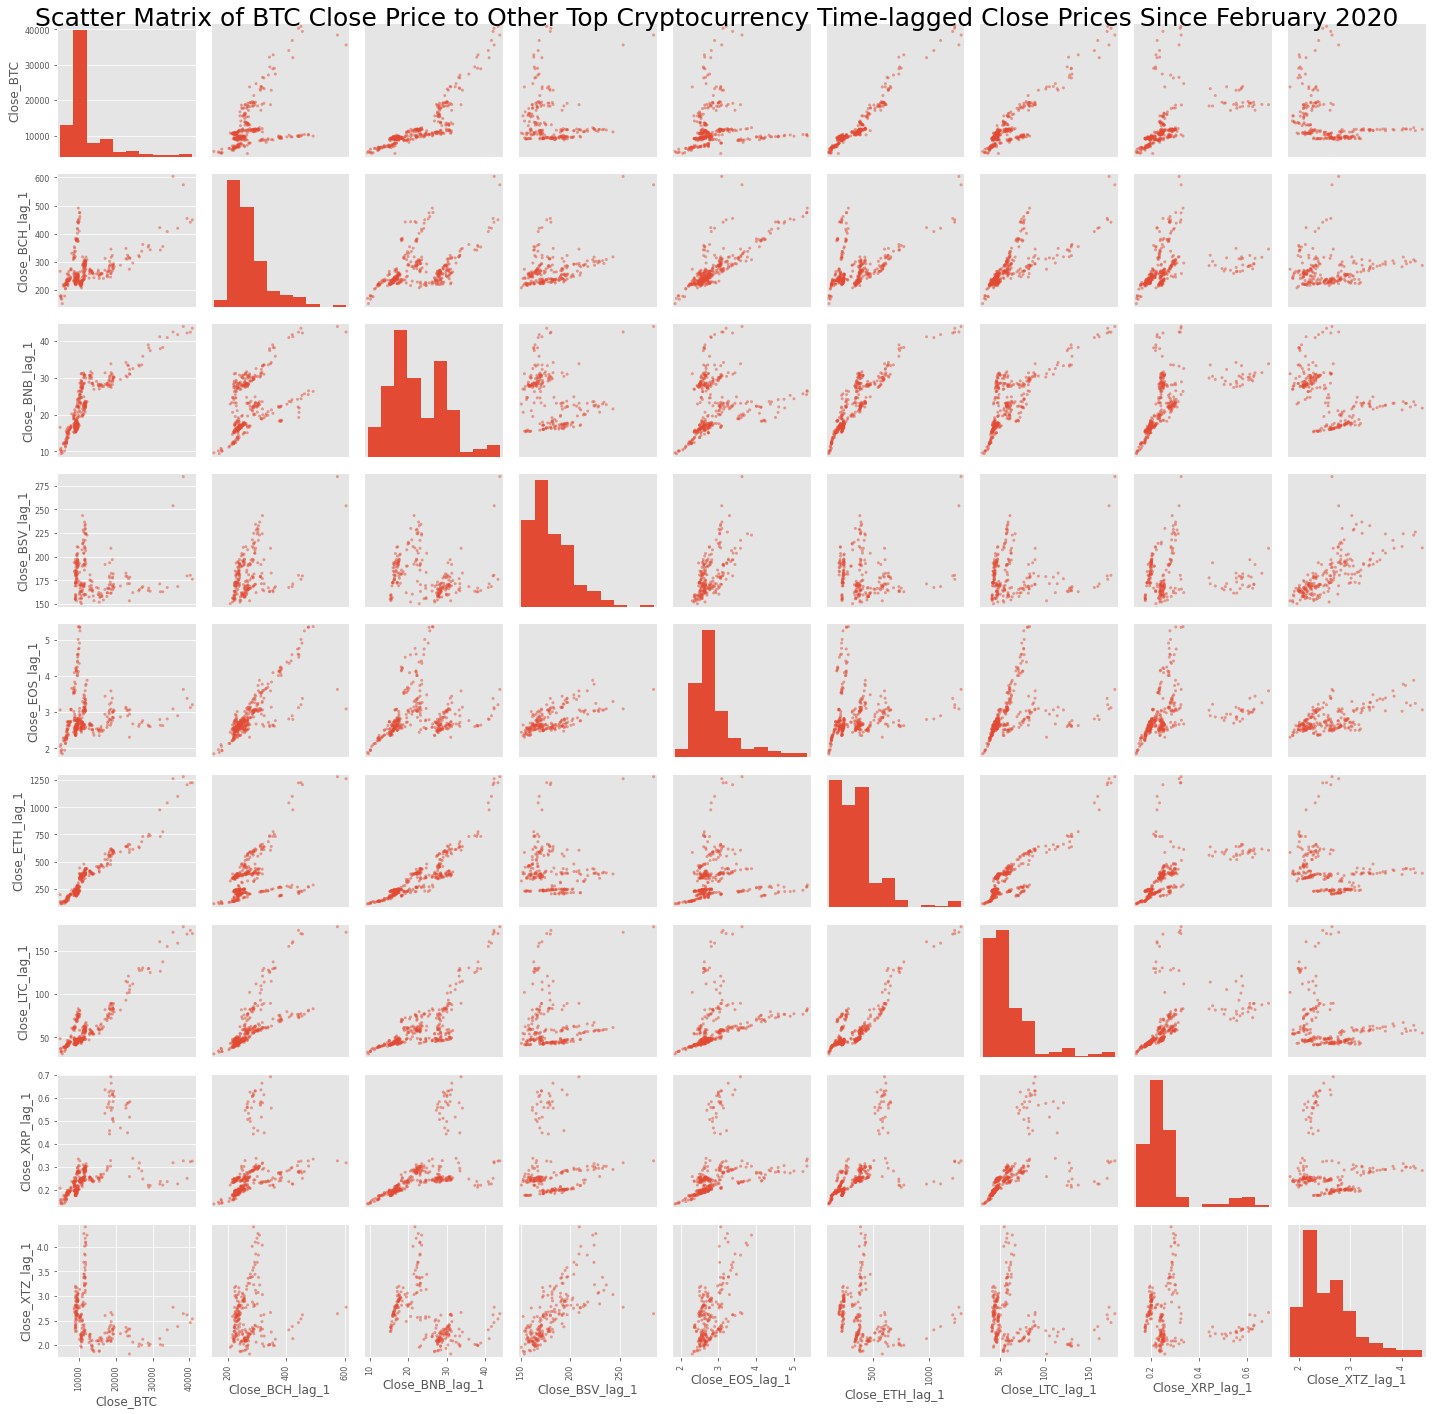

In [81]:
pd.plotting.scatter_matrix(df_corr_baseline, figsize = (20,20))
plt.suptitle('Scatter Matrix of BTC Close Price to Other Top Cryptocurrency Time-lagged Close Prices Since February 2020', fontsize = 25)
plt.tight_layout()

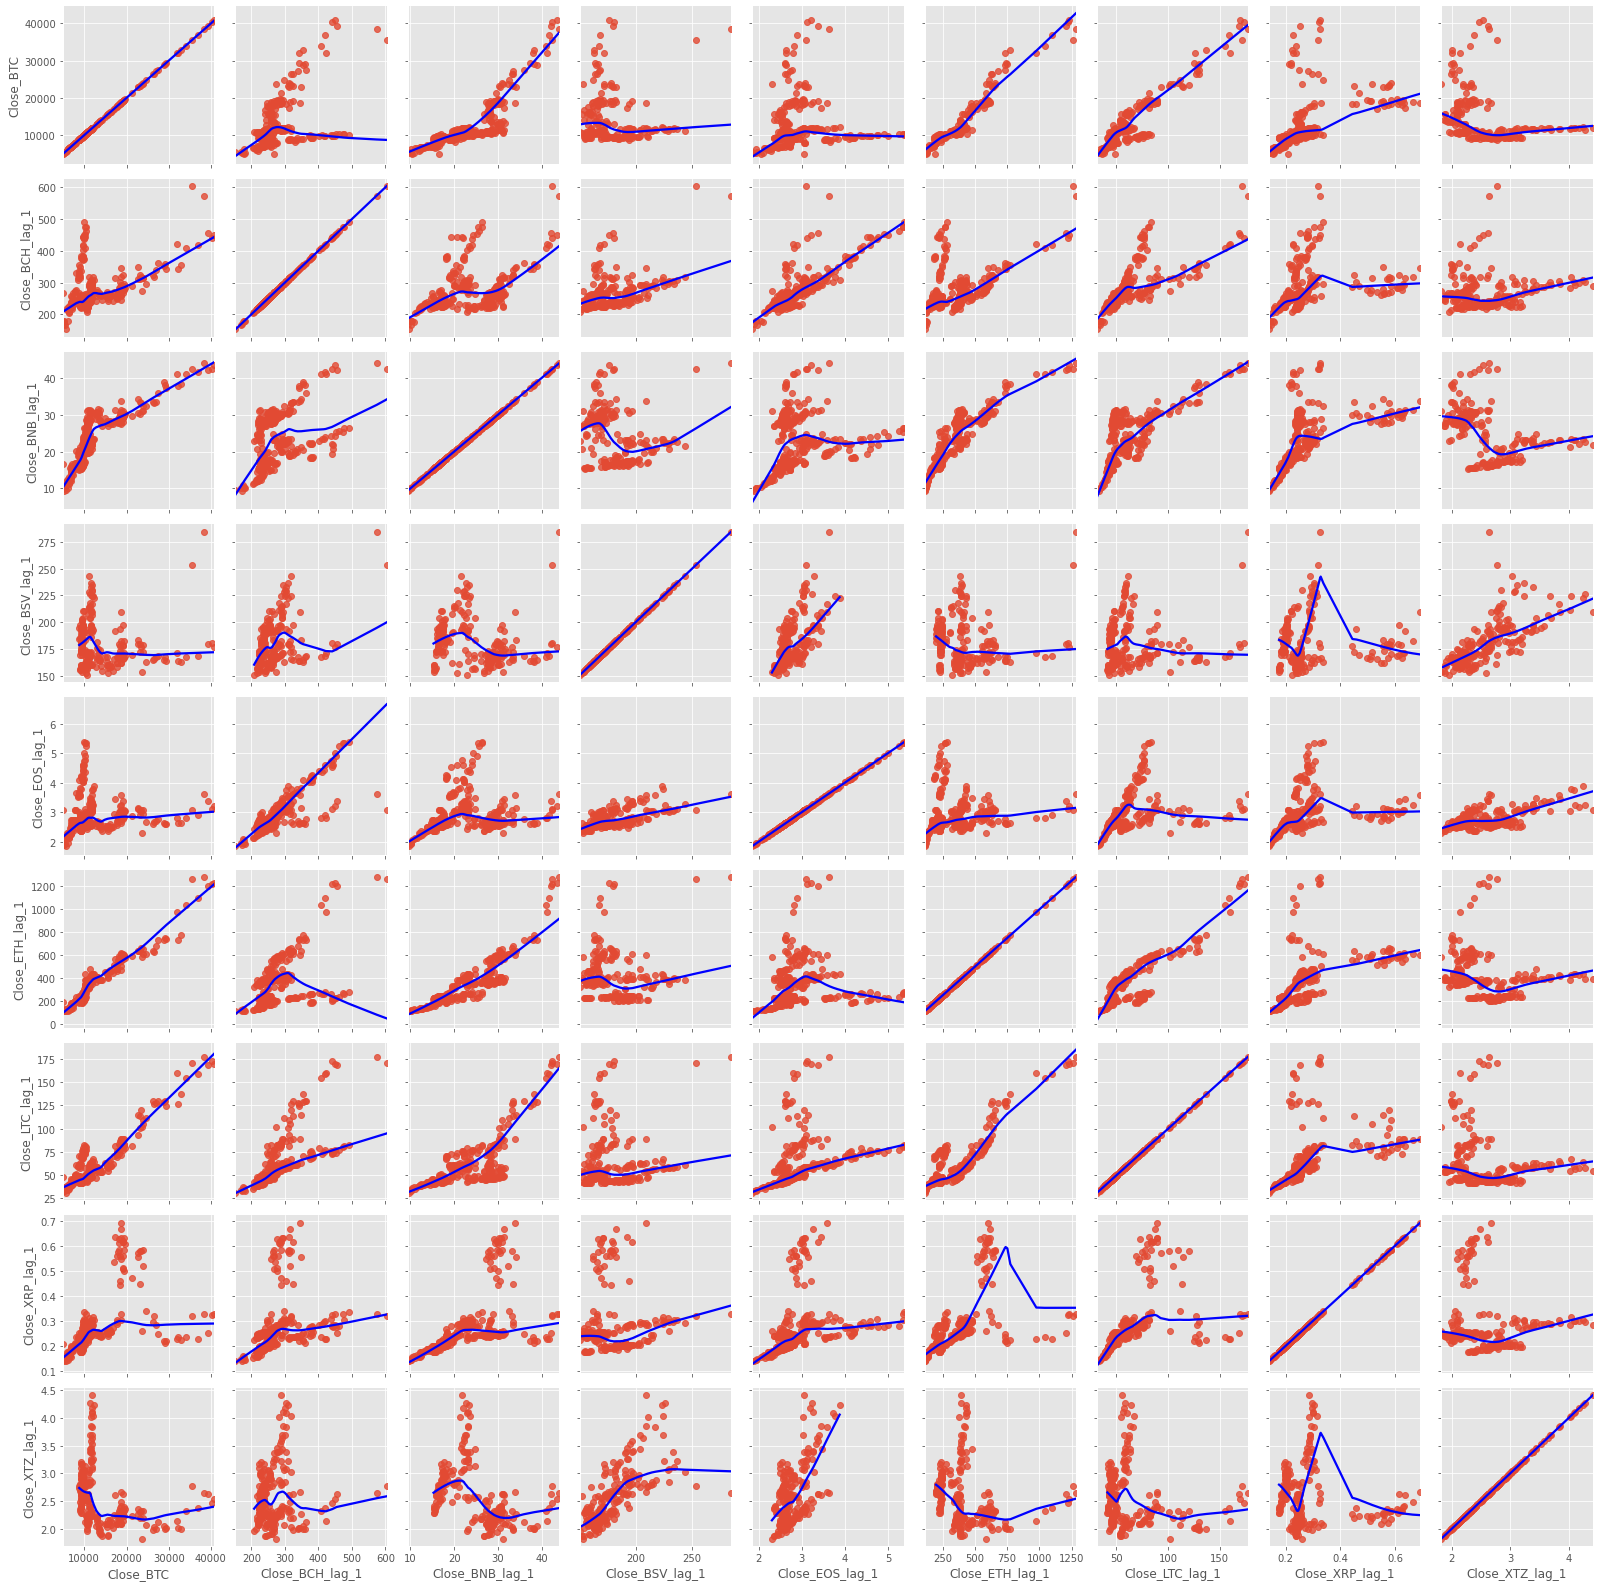

In [82]:
grids = sns.PairGrid(df_corr_baseline)
grids = grids.map(sns.regplot, lowess=True, scatter = True, line_kws={'color': 'blue'})

In [83]:
#highest correlation of BTC Close Price to ETH, LTC, BNB, 
#BCH, and XRP
#will test for multicollinearity of explanatory variables 
#when constructing best-fit model

Text(0, 0.5, 'BTC Closing Price (in USD)')

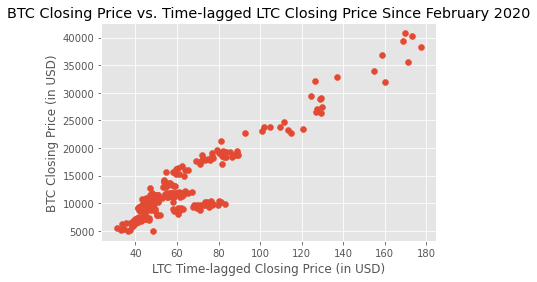

In [84]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_LTC_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged LTC Closing Price Since February 2020')
ax.set_xlabel('LTC Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

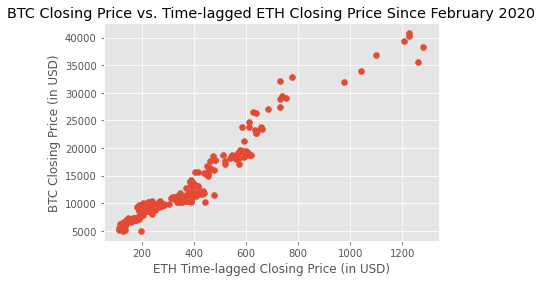

In [85]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_ETH_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged ETH Closing Price Since February 2020')
ax.set_xlabel('ETH Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

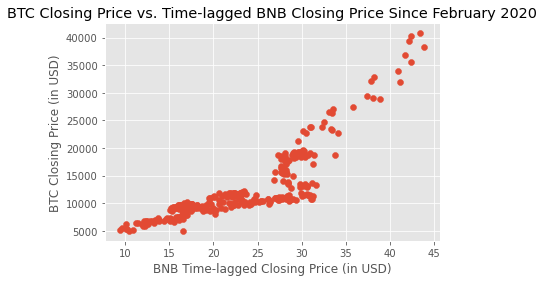

In [86]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_BNB_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged BNB Closing Price Since February 2020')
ax.set_xlabel('BNB Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

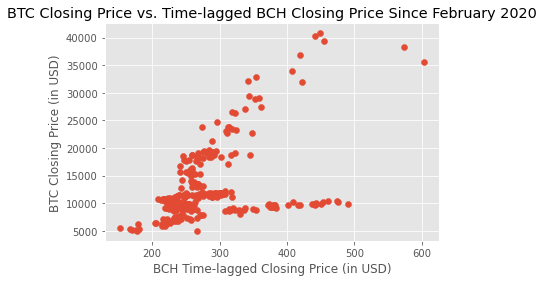

In [87]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_BCH_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged BCH Closing Price Since February 2020')
ax.set_xlabel('BCH Time-lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

Text(0, 0.5, 'BTC Closing Price (in USD)')

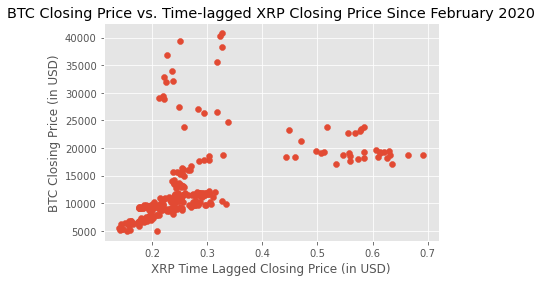

In [88]:
fig, ax = plt.subplots()
ax.scatter(x = df_corr_baseline['Close_XRP_lag_1'], y = df_corr_baseline['Close_BTC'])
ax.set_title('BTC Closing Price vs. Time-lagged XRP Closing Price Since February 2020')
ax.set_xlabel('XRP Time Lagged Closing Price (in USD)')
ax.set_ylabel('BTC Closing Price (in USD)')

In [89]:
df_btc_baseline = df_btc[df_btc.index >= '2020-02-01']

In [90]:
df_btc_baseline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346 entries, 2020-02-01 to 2021-01-11
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  346 non-null    float64
 1   High                  346 non-null    float64
 2   Low                   346 non-null    float64
 3   Close                 346 non-null    float64
 4   Adj Close             346 non-null    float64
 5   Volume                346 non-null    float64
 6   Volume_Price          346 non-null    float64
 7   10_Day_VWAP           346 non-null    float64
 8   Daily_Return          346 non-null    float64
 9   Biweekly_RS           346 non-null    float64
 10  Biweekly_RSI          346 non-null    float64
 11  12_day_EMA            346 non-null    float64
 12  26_day_EMA            346 non-null    float64
 13  MACD                  346 non-null    float64
 14  Signal                346 non-null    float64
 15  Tren

In [91]:
#Since Feb 1, 2020, 346 days have elapsed, so all dates 
#are accounted for
#Relative Time will initiate at Feb 1, 2020 = 0 and 
#end on Jan 11, 2020 = 345, in terms of days elapsed

In [92]:
df_btc_baseline['Relative_Time'] = float('NaN')

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
for i in range(len(df_btc_baseline)):
    df_btc_baseline['Relative_Time'][i] = i

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [94]:
#first model will just consider relative time to visualize trend
model1 = ols('np.log(Close) ~ Relative_Time', data = df_btc_baseline).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Close)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     783.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.14e-90
Time:                        15:28:32   Log-Likelihood:                 38.233
No. Observations:                 346   AIC:                            -72.47
Df Residuals:                     344   BIC:                            -64.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7511      0.023    375.386      0.000       8.705       8.797
Relative_Time     0.0033      0.000     27.986      0.000       0.003       0.004
==============================================================================
Omnibus:                       53.617   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.482
Skew:                           1.055   Prob(JB):                     6.71e-17
Kurtosis:                       3.844   Cond. No.                         398.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
df_btc_model1 = stat()
df_btc_model1.anova_stat(df = df_btc_baseline, res_var='Close', anova_model='np.log(Close) ~ Relative_Time')
df_btc_model1.anova_summary

df     sum_sq    mean_sq         F        PR(>F)
Relative_Time    1.0  36.977067  36.977067  783.1933  1.138120e-90
Residual       344.0  16.241343   0.047213       NaN           NaN

In [96]:
model1_fitted_y_values = model1.fittedvalues
model1_norm_resids = df_btc_model1.anova_std_residuals
model1_norm_resids_abs_sqrt = np.sqrt(np.abs(model1_norm_resids))
model1_lev = model1.get_influence().hat_matrix_diag

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

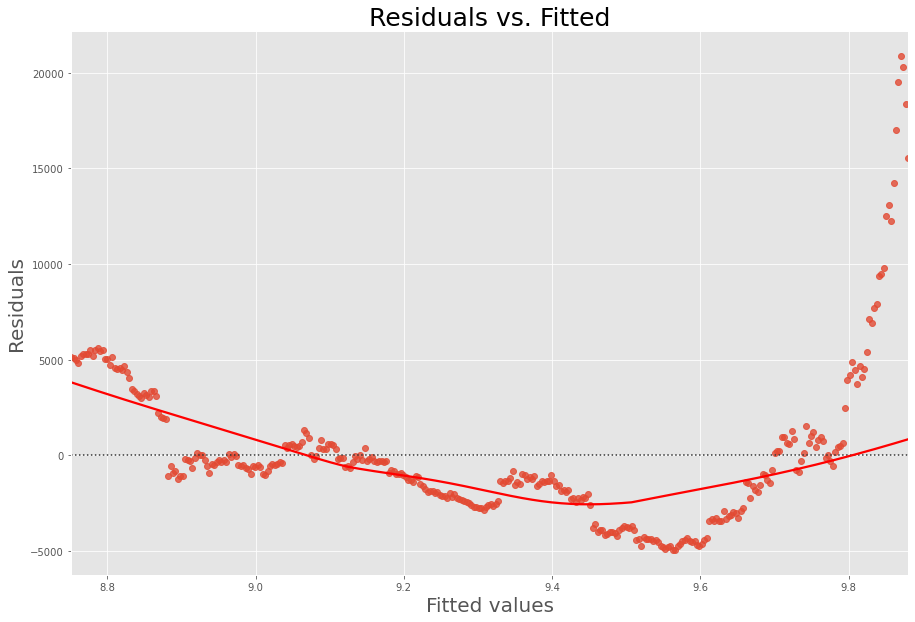

In [97]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model1_fitted_y_values, df_btc_baseline['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('Residuals', fontsize = 20)
#AUTOREGRESSION EVIDENT

Text(0, 0.5, 'Standardized residuals')

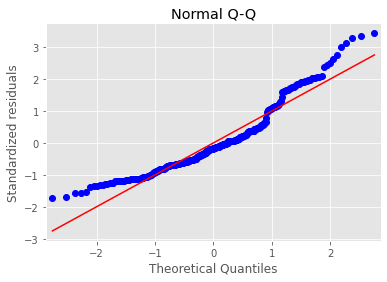

In [98]:
QQ = sgg.ProbPlot(model1_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

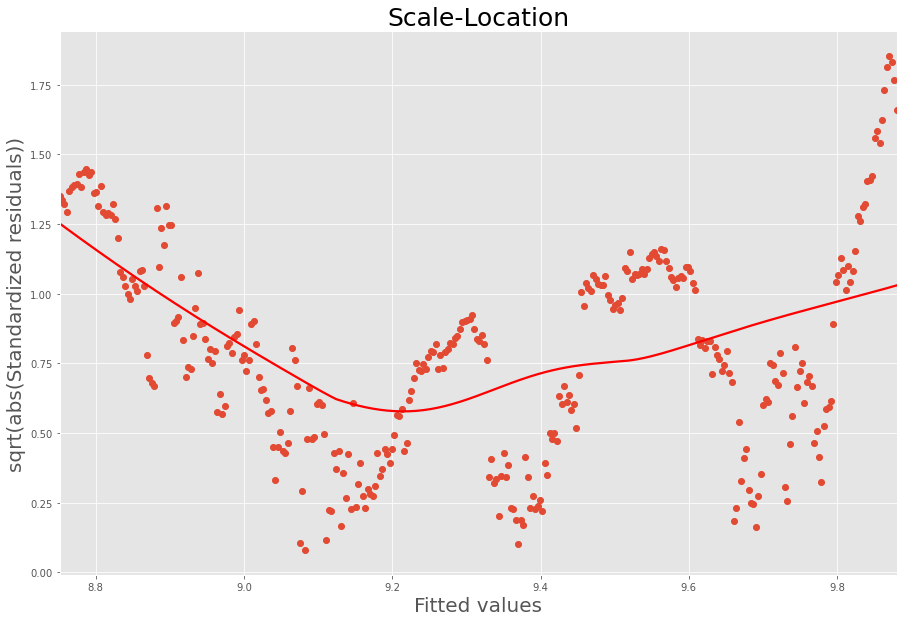

In [99]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model1_fitted_y_values, model1_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model1_fitted_y_values, model1_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('sqrt(abs(Standardized residuals))', fontsize = 20)
#Autoregression EVIDENT

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Standardized Residuals')

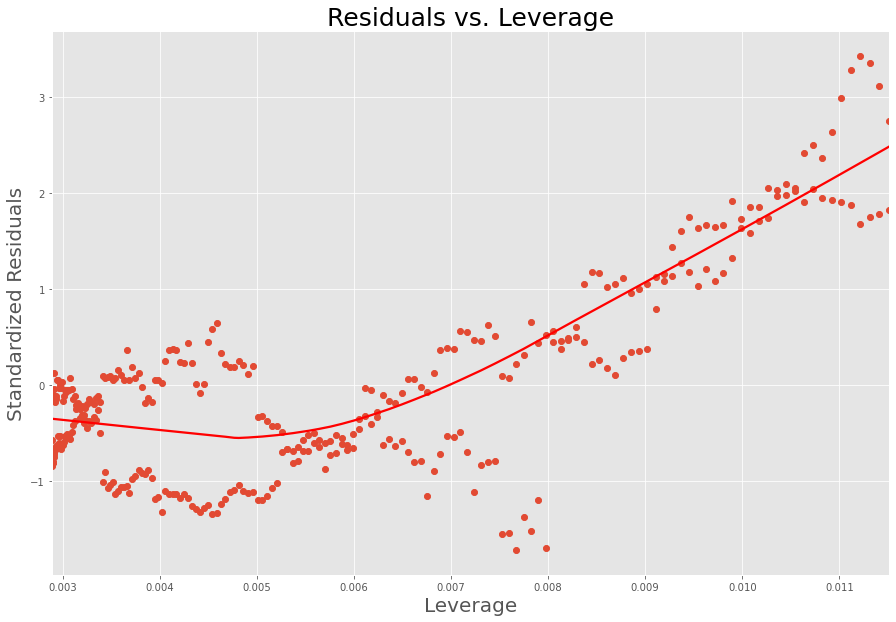

In [100]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model1_lev, model1_norm_resids)
sns.regplot(model1_lev, model1_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage', fontsize = 25)
ax.set_xlabel('Leverage', fontsize = 20)
ax.set_ylabel('Standardized Residuals', fontsize = 20)

In [101]:
#The first model, model1, could be used as a comparison in 
#terms of improving RMSE of subsequent models
#Based on assumptions of linear regression, 
#i.e. a general linear trend between the 
#response/explanatory variables,
#no multicollinearity amongst its' explanatory variables, 
#normality of its' residuals, and 
#randomness of its' residuals with constant variation; 
#there is no randomness to its' errors, 
#i.e. there is an autoregressive/cyclical nature to them,
#therefore this model is not appropriate/cannot be used

In [102]:
#incorporate monthly seasonality into model 
#via monthly dummy variables
df_btc_baseline['Month'] = pd.to_datetime(df_btc_baseline.index).month

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
df_dummies_months = pd.get_dummies(df_btc_baseline['Month'], drop_first = False)
df_dummies_months.columns = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

In [104]:
#df_btc_baseline.drop('Month', axis = 1, inplace = True)

In [105]:
df_btc_baseline_dummies = pd.concat([df_btc_baseline, df_dummies_months], axis = 1)

In [106]:
#second model: multiple linear regression with monthly dummies
model2 = ols('np.log(Close) ~ Relative_Time + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan', data = df_btc_baseline_dummies).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Close)   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     500.1
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          8.99e-205
Time:                        15:28:35   Log-Likelihood:                 342.50
No. Observations:                 346   AIC:                            -659.0
Df Residuals:                     333   BIC:                            -609.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.1554      0.095     85.897      0.000       7.969       8.342
Relative_Time     0.0030      0.001      5.272      0.000       0.002       0.004
Feb               1.3002      0.102     12.778      0.000       1.100       1.500
Mar               0.9742      0.088     11.021      0.000       0.800       1.148
Apr               0.5288      0.072      7.385      0.000       0.388       0.670
May               0.5042      0.055      9.184      0.000       0.396       0.612
Jun               0.6630      0.039     17.192      0.000       0.587       0.739
Jul               0.5962      0.024     24.823      0.000       0.549       0.643
Aug               0.5134      0.016     32.336      0.000       0.482       0.545
Sep               0.6174      0.023     26.435      0.000       0.571       0.663
Oct               0.4366      0.038     11.475      0.000       0.362       0.511
Nov               0.4511      0.054      8.326      0.000       0.345       0.558
Dec               0.6949      0.071      9.789      0.000       0.555       0.835
Jan               0.8754      0.088      9.957      0.000       0.702       1.048
==============================================================================
Omnibus:                       42.336   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.895
Skew:                           0.540   Prob(JB):                     2.06e-27
Kurtosis:                       5.712   Cond. No.                     1.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [107]:
df_btc_model2 = stat()
df_btc_model2.anova_stat(df = df_btc_baseline_dummies, res_var='Close', 
                                  anova_model='np.log(Close) ~ Relative_Time + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan')
df_btc_model2.anova_summary

df    sum_sq   mean_sq            F         PR(>F)
Relative_Time    1.0  0.233494  0.233494    27.791797   2.434699e-07
Feb              1.0  1.371873  1.371873   163.288104   1.062803e-30
Mar              1.0  1.020381  1.020381   121.451600   2.746138e-24
Apr              1.0  0.458197  0.458197    54.537160   1.234265e-12
May              1.0  0.708674  0.708674    84.350438   4.530978e-18
Jun              1.0  2.483281  2.483281   295.574239   7.301010e-48
Jul              1.0  5.177009  5.177009   616.197044   9.786796e-78
Aug              1.0  8.784647  8.784647  1045.598693  9.344954e-105
Sep              1.0  5.871116  5.871116   698.813643   8.846069e-84
Oct              1.0  1.106187  1.106187   131.664672   6.595079e-26
Nov              1.0  0.582389  0.582389    69.319243   2.198649e-15
Dec              1.0  0.805029  0.805029    95.819188   4.728429e-20
Jan              1.0  0.832886  0.832886    99.134858   1.294758e-20
Residual       333.0  2.797715  0.008402          NaN            NaN

In [108]:
model2_fitted_y_values = model2.fittedvalues
model2_norm_resids = df_btc_model2.anova_std_residuals
model2_norm_resids_abs_sqrt = np.sqrt(np.abs(model2_norm_resids))
model2_lev = model2.get_influence().hat_matrix_diag

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

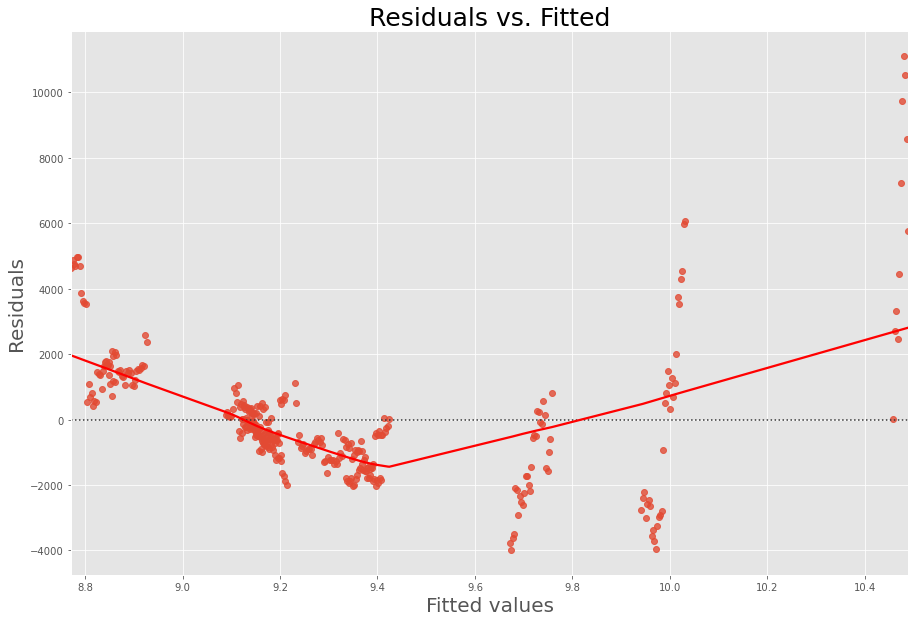

In [109]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model2_fitted_y_values, df_btc_baseline_dummies['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('Residuals', fontsize = 20)

Text(0, 0.5, 'Standardized residuals')

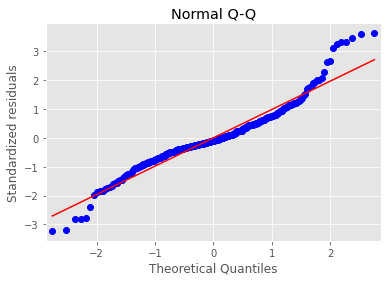

In [110]:
QQ = sgg.ProbPlot(model2_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

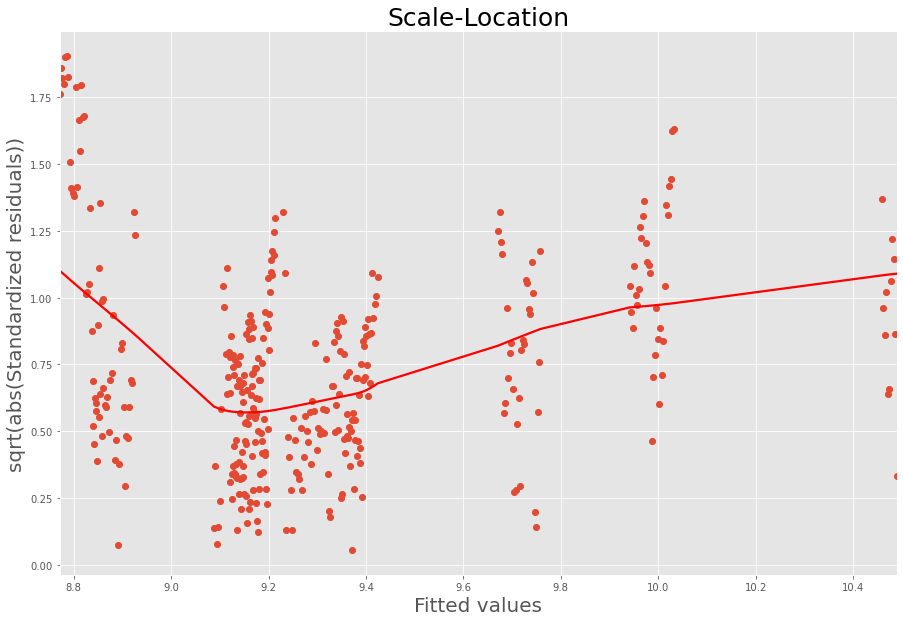

In [111]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model2_fitted_y_values, model2_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model2_fitted_y_values, model2_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('sqrt(abs(Standardized residuals))', fontsize = 20)
#constant variation and randomness of errors/residuals

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Standardized Residuals')

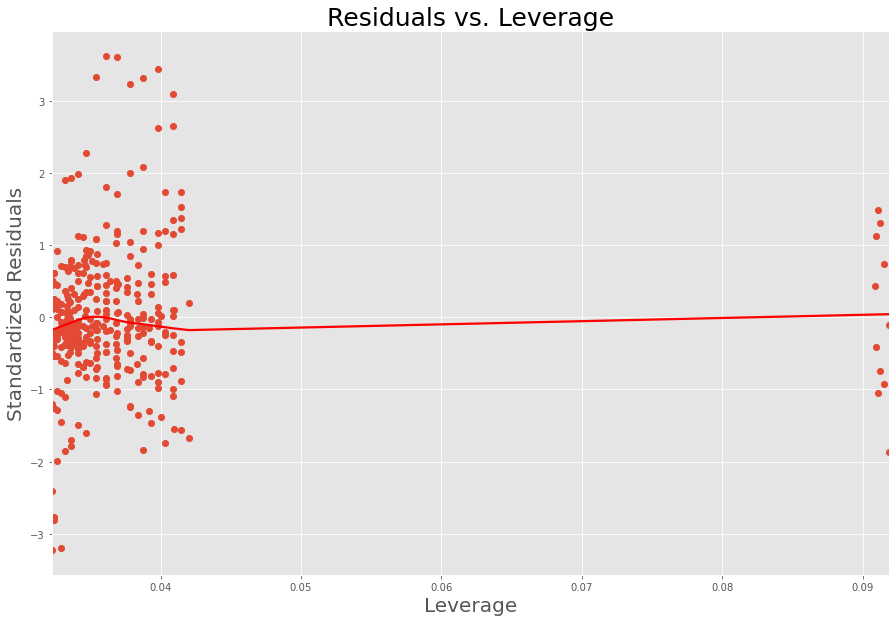

In [112]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model2_lev, model2_norm_resids)
sns.regplot(model2_lev, model2_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage', fontsize = 25)
ax.set_xlabel('Leverage', fontsize = 20)
ax.set_ylabel('Standardized Residuals', fontsize = 20)

In [113]:
y_pred_2 = model2.predict(df_btc_baseline_dummies[['Relative_Time', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']])

In [114]:
y_pred_1 = model1.predict(df_btc_baseline['Relative_Time'])

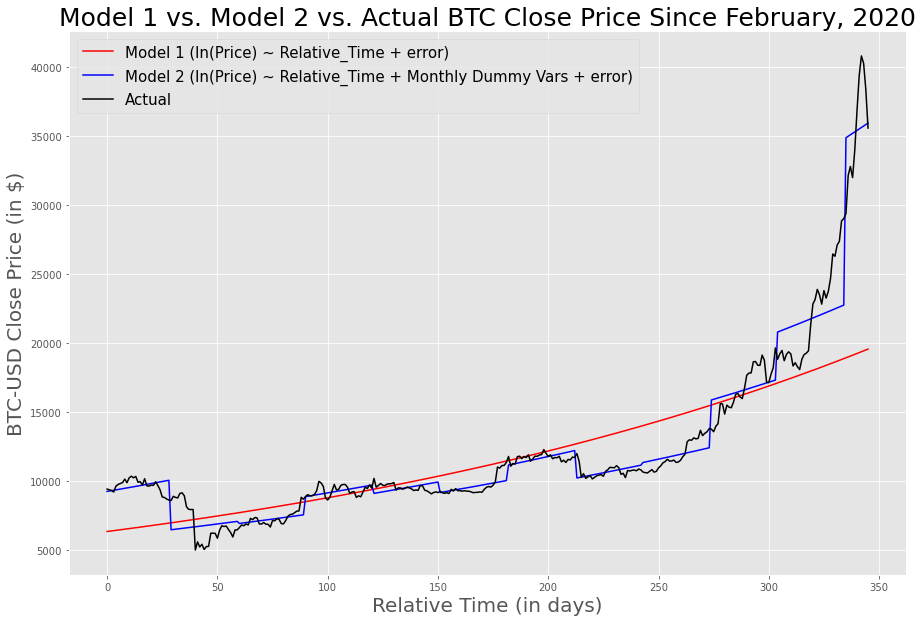

In [115]:
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_baseline_dummies['Relative_Time']
actual = df_btc_baseline['Close']
ax.plot(t, e**y_pred_1, color = 'red', label = 'Model 1 (ln(Price) ~ Relative_Time + error)')
ax.plot(t, e**y_pred_2, color = 'blue', label = 'Model 2 (ln(Price) ~ Relative_Time + Monthly Dummy Vars + error)')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('Model 1 vs. Model 2 vs. Actual BTC Close Price Since February, 2020', fontsize = 25)
ax.set_xlabel('Relative Time (in days)', fontsize = 20)
ax.set_ylabel('BTC-USD Close Price (in $)', fontsize = 20)
plt.legend(fontsize = 15)

In [116]:
#Strengthen model with correlated time-lagged cryptocurrencies 
#of ETH, LTC, BNB, BCH, and XRP

In [117]:
df_btc_CCC_dummies = pd.concat([df_btc_baseline_dummies, df_corr_baseline[['Close_LTC_lag_1', 'Close_ETH_lag_1', 'Close_BNB_lag_1', 'Close_BCH_lag_1', 'Close_XRP_lag_1']]], axis = 1)

In [118]:
df_btc_CCC_dummies.info() #all non-null values!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346 entries, 2020-02-01 to 2021-01-11
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  346 non-null    float64
 1   High                  346 non-null    float64
 2   Low                   346 non-null    float64
 3   Close                 346 non-null    float64
 4   Adj Close             346 non-null    float64
 5   Volume                346 non-null    float64
 6   Volume_Price          346 non-null    float64
 7   10_Day_VWAP           346 non-null    float64
 8   Daily_Return          346 non-null    float64
 9   Biweekly_RS           346 non-null    float64
 10  Biweekly_RSI          346 non-null    float64
 11  12_day_EMA            346 non-null    float64
 12  26_day_EMA            346 non-null    float64
 13  MACD                  346 non-null    float64
 14  Signal                346 non-null    float64
 15  Tren

In [119]:
#third model with these additional variables
model3 = ols('Close ~ Relative_Time + Feb + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_ETH_lag_1 + Close_BNB_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model3.summary()
#Close_BNB_lag_1's t-stat p-value is largest and greater than an alpha of 0.05, therefore it is statistically insignificant
#in describing the variation in BTC's Close Price for this time interval, will drop in subsequent model
#Mar is default month and is removed from set of monthly dummy variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1937.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          3.40e-317
Time:                        15:28:38   Log-Likelihood:                -2707.9
No. Observations:                 346   AIC:                             5452.
Df Residuals:                     328   BIC:                             5521.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1395.3622    544.178      2.564      0.011     324.843    2465.881
Relative_Time      20.6213      4.576      4.506      0.000      11.619      29.624
Feb              3682.0852   1312.822      2.805      0.005    1099.472    6264.698
Apr              -395.8941    274.507     -1.442      0.150    -935.910     144.122
May              -476.3341    344.966     -1.381      0.168   -1154.960     202.291
Jun               500.5231    437.488      1.144      0.253    -360.114    1361.160
Jul               -86.6771    553.106     -0.157      0.876   -1174.760    1001.406
Aug              -789.0289    667.440     -1.182      0.238   -2102.033     523.975
Sep             -1504.3796    776.185     -1.938      0.053   -3031.308      22.549
Oct             -2103.0233    905.289     -2.323      0.021   -3883.929    -322.118
Nov             -1708.0978   1032.242     -1.655      0.099   -3738.748     322.553
Dec                27.5314   1121.121      0.025      0.980   -2177.963    2233.026
Jan               727.1982   1216.084      0.598      0.550   -1665.111    3119.507
Close_LTC_lag_1   126.0784      7.724     16.322      0.000     110.883     141.274
Close_ETH_lag_1     6.0221      1.237      4.870      0.000       3.589       8.455
Close_BNB_lag_1    12.2000     26.754      0.456      0.649     -40.432      64.832
Close_BCH_lag_1    -4.8466      2.183     -2.220      0.027      -9.141      -0.552
Close_XRP_lag_1 -3589.5816    607.341     -5.910      0.000   -4784.357   -2394.806
==============================================================================
Omnibus:                       67.681   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.296
Skew:                          -0.517   Prob(JB):                    9.65e-122
Kurtosis:                       9.131   Cond. No.                     4.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model4 = ols('Close ~ Relative_Time + Feb + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan + Close_LTC_lag_1 + Close_ETH_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1', 
             data = df_btc_CCC_dummies).fit()
model4.summary()
#Dec's t-stat p-value is largest and greater than an alpha of 0.05, therefore it
#is statistically insignificant in describing the variation in BTC's Close Price for this time interval, 
#will drop in subsequent model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2063.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          8.18e-319
Time:                        15:28:39   Log-Likelihood:                -2708.0
No. Observations:                 346   AIC:                             5450.
Df Residuals:                     329   BIC:                             5515.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1410.7974    542.470      2.601      0.010     343.650    2477.945
Relative_Time      21.1772      4.406      4.807      0.000      12.511      29.844
Feb              3679.1781   1311.225      2.806      0.005    1099.735    6258.621
Apr              -407.2233    273.051     -1.491      0.137    -944.370     129.923
May              -490.8745    343.076     -1.431      0.153   -1165.773     184.024
Jun               485.1442    435.661      1.114      0.266    -371.888    1342.177
Jul              -117.3779    548.332     -0.214      0.831   -1196.057     961.301
Aug              -822.7000    662.544     -1.242      0.215   -2126.057     480.657
Sep             -1528.6125    773.431     -1.976      0.049   -3050.106      -7.119
Oct             -2072.3676    901.702     -2.298      0.022   -3846.197    -298.538
Nov             -1651.9226   1023.630     -1.614      0.108   -3665.609     361.764
Dec                37.2343   1119.569      0.033      0.973   -2165.182    2239.651
Jan               717.3395   1214.428      0.591      0.555   -1671.683    3106.362
Close_LTC_lag_1   126.8387      7.533     16.837      0.000     112.020     141.658
Close_ETH_lag_1     5.9929      1.233      4.858      0.000       3.566       8.419
Close_BCH_lag_1    -4.3563      1.898     -2.296      0.022      -8.090      -0.623
Close_XRP_lag_1 -3602.2569    605.974     -5.945      0.000   -4794.329   -2410.185
==============================================================================
Omnibus:                       68.030   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.302
Skew:                          -0.517   Prob(JB):                    6.49e-124
Kurtosis:                       9.187   Cond. No.                     4.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
model5 = ols('Close ~ Relative_Time + Feb + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Jan + Close_LTC_lag_1 + Close_BCH_lag_1 + Close_XRP_lag_1 + Close_ETH_lag_1', 
             data = df_btc_CCC_dummies).fit()
model5.summary()
#Jul's t-stat p-value is largest and greater than an alpha of 0.05, 
#therefore it is statistically insignificant in describing the variation in BTC's Close Price for this time interval, 
#will drop in subsequent model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2207.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.71e-320
Time:                        15:28:39   Log-Likelihood:                -2708.0
No. Observations:                 346   AIC:                             5448.
Df Residuals:                     330   BIC:                             5510.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1409.9594    541.064      2.606      0.010     345.590    2474.328
Relative_Time      21.3119      1.726     12.345      0.000      17.916      24.708
Feb              3638.5922    478.928      7.597      0.000    2696.455    4580.730
Apr              -411.8927    233.834     -1.761      0.079    -871.887      48.101
May              -499.7342    215.854     -2.315      0.021    -924.358     -75.111
Jun               472.2040    195.684      2.413      0.016      87.259     857.149
Jul              -134.4718    190.726     -0.705      0.481    -509.664     240.721
Aug              -843.8818    182.270     -4.630      0.000   -1202.439    -485.325
Sep             -1553.7693    161.080     -9.646      0.000   -1870.642   -1236.897
Oct             -2101.7131    185.444    -11.333      0.000   -2466.516   -1736.911
Nov             -1685.4197    182.407     -9.240      0.000   -2044.247   -1326.592
Jan               677.6856    230.305      2.943      0.003     224.635    1130.736
Close_LTC_lag_1   126.7781      7.299     17.370      0.000     112.421     141.136
Close_BCH_lag_1    -4.3480      1.878     -2.315      0.021      -8.043      -0.653
Close_XRP_lag_1 -3601.9835    605.000     -5.954      0.000   -4792.127   -2411.840
Close_ETH_lag_1     5.9942      1.231      4.869      0.000       3.573       8.416
==============================================================================
Omnibus:                       67.993   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.502
Skew:                          -0.517   Prob(JB):                    9.68e-124
Kurtosis:                       9.183   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
model6 = ols('Close ~ Relative_Time + Feb + Jun + Aug + Sep + Oct + Nov + Jan + Close_LTC_lag_1 + Close_XRP_lag_1 + Close_ETH_lag_1', 
             data = df_btc_CCC_dummies).fit()
model6.summary()
#Apr, May, and Close_BCH's t-stat p-values were also greater than an alpha of 0.05, 
#therefore they were statistically insignificant in describing the variation in BTC's Close Price for this time interval
#and were not included as well

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2971.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:28:39   Log-Likelihood:                -2712.2
No. Observations:                 346   AIC:                             5448.
Df Residuals:                     334   BIC:                             5495.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         233.4058    196.713      1.187      0.236    -153.546     620.358
Relative_Time      24.4991      1.134     21.605      0.000      22.268      26.730
Feb              3746.2161    442.657      8.463      0.000    2875.469    4616.963
Jun               751.3955    126.270      5.951      0.000     503.010     999.781
Aug              -699.5794    132.282     -5.289      0.000    -959.790    -439.369
Sep             -1511.8125    140.057    -10.794      0.000   -1787.318   -1236.307
Oct             -1984.1860    148.284    -13.381      0.000   -2275.875   -1692.497
Nov             -1721.4912    149.058    -11.549      0.000   -2014.703   -1428.280
Jan               754.5281    199.834      3.776      0.000     361.435    1147.621
Close_LTC_lag_1   120.9422      5.286     22.880      0.000     110.544     131.340
Close_XRP_lag_1 -3800.6275    542.604     -7.004      0.000   -4867.979   -2733.276
Close_ETH_lag_1     5.0897      1.155      4.408      0.000       2.818       7.361
==============================================================================
Omnibus:                       69.865   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.464
Skew:                          -0.496   Prob(JB):                    2.82e-143
Kurtosis:                       9.675   Cond. No.                     8.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#calculate VIF scores of additional variables to other variables
model1_XRP = ols('Close_XRP_lag_1 ~ Relative_Time + Feb + Jun + Aug + Sep + Oct + Nov + Jan + Close_LTC_lag_1 + Close_ETH_lag_1', 
             data = df_btc_CCC_dummies).fit()
model1_XRP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Close_XRP_lag_1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     67.03
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           7.96e-74
Time:                        15:28:39   Log-Likelihood:                 471.63
No. Observations:                 346   AIC:                            -921.3
Df Residuals:                     335   BIC:                            -878.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1520      0.018      8.454      0.000       0.117       0.187
Relative_Time      -0.0004      0.000     -3.516      0.000      -0.001      -0.000
Feb                -0.3941      0.039    -10.099      0.000      -0.471      -0.317
Jun                -0.0100      0.013     -0.790      0.430      -0.035       0.015
Aug                -0.0316      0.013     -2.394      0.017      -0.058      -0.006
Sep                -0.0282      0.014     -2.014      0.045      -0.056      -0.001
Oct                -0.0519      0.015     -3.540      0.000      -0.081      -0.023
Nov                -0.0402      0.015     -2.706      0.007      -0.069      -0.011
Jan                 0.0949      0.019      4.883      0.000       0.057       0.133
Close_LTC_lag_1    -0.0015      0.001     -2.924      0.004      -0.003      -0.001
Close_ETH_lag_1     0.0008      0.000      7.852      0.000       0.001       0.001
==============================================================================
Omnibus:                       67.496   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.443
Skew:                           0.030   Prob(JB):                    4.50e-242
Kurtosis:                      11.780   Cond. No.                     5.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
VIF_XRP = 1/(1-0.667)
VIF_XRP
#less than 5, therefore no significant multicollinearity with other explanatory variables

3.0030030030030033

In [125]:
model2_LTC = ols('Close_LTC_lag_1 ~ Relative_Time + Feb + May + Jun + Aug + Sep + Oct + Nov + Jan + Close_XRP_lag_1 + Close_ETH_lag_1', 
             data = df_btc_CCC_dummies).fit()
model2_LTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Close_LTC_lag_1   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     466.0
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          3.49e-195
Time:                        15:28:39   Log-Likelihood:                -1128.0
No. Observations:                 346   AIC:                             2280.
Df Residuals:                     334   BIC:                             2326.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.2830      1.429     21.185      0.000      27.471      33.095
Relative_Time      -0.1485      0.008    -17.806      0.000      -0.165      -0.132
Feb                -4.9153      4.600     -1.069      0.286     -13.964       4.133
May                -3.2658      1.385     -2.358      0.019      -5.990      -0.541
Jun                -3.0906      1.338     -2.310      0.022      -5.723      -0.458
Aug                -2.5074      1.392     -1.801      0.073      -5.246       0.231
Sep                -7.5975      1.385     -5.484      0.000     -10.323      -4.872
Oct                -9.3861      1.453     -6.459      0.000     -12.245      -6.528
Nov                -4.0018      1.530     -2.616      0.009      -7.011      -0.992
Jan                13.9934      1.924      7.274      0.000      10.209      17.778
Close_XRP_lag_1   -16.5594      5.503     -3.009      0.003     -27.384      -5.735
Close_ETH_lag_1     0.1771      0.007     25.900      0.000       0.164       0.191
==============================================================================
Omnibus:                       77.569   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.884
Skew:                           0.966   Prob(JB):                     2.24e-57
Kurtosis:                       6.790   Cond. No.                     7.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
VIF_LTC = 1/(1-0.939)
VIF_LTC
#> 5, therefore significant multicollinearity with other explanatory variables

16.393442622950804

In [127]:
model3_ETH = ols('Close_ETH_lag_1 ~ Relative_Time + Feb + May + Jun + Aug + Sep + Oct + Nov + Jan + Close_XRP_lag_1 + Close_LTC_lag_1', 
             data = df_btc_CCC_dummies).fit()
model3_ETH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Close_ETH_lag_1   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1299.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          1.46e-266
Time:                        15:28:40   Log-Likelihood:                -1657.0
No. Observations:                 346   AIC:                             3338.
Df Residuals:                     334   BIC:                             3384.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -87.5446      8.889     -9.848      0.000    -105.031     -70.058
Relative_Time       0.8508      0.027     31.683      0.000       0.798       0.904
Feb               209.9676     17.891     11.736      0.000     174.775     245.161
May                -2.9173      6.442     -0.453      0.651     -15.589       9.754
Jun                -1.6849      6.223     -0.271      0.787     -13.926      10.557
Aug                -4.9423      6.449     -0.766      0.444     -17.629       7.744
Sep                42.0320      6.266      6.708      0.000      29.706      54.357
Oct                35.7332      6.838      5.226      0.000      22.283      49.184
Nov                 7.9806      7.118      1.121      0.263      -6.021      21.982
Jan               -26.2838      9.445     -2.783      0.006     -44.863      -7.704
Close_XRP_lag_1   184.5847     23.669      7.798      0.000     138.025     231.144
Close_LTC_lag_1     3.7702      0.146     25.900      0.000       3.484       4.057
==============================================================================
Omnibus:                      177.874   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5071.658
Skew:                          -1.535   Prob(JB):                         0.00
Kurtosis:                      21.503   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
VIF_ETH = 1/(1-0.977)
VIF_ETH
#> 5, therefore significant multicollinearity with other explanatory variables

43.478260869565176

In [129]:
#however, for time series and predicting without 
#focus on independent variables' meaning individually,
#multicollinearity can be ignored just in this case

In [130]:
df_btc_model6 = stat()
df_btc_model6.anova_stat(df = df_btc_CCC_dummies, res_var='Close', 
                                  anova_model='Close ~ Relative_Time + Feb + Jun + Aug + Sep + Oct + Nov + Jan + Close_LTC_lag_1 + Close_XRP_lag_1 + Close_ETH_lag_1')
df_btc_model6.anova_summary

df        sum_sq       mean_sq           F        PR(>F)
Relative_Time      1.0  1.822733e+08  1.822733e+08  466.778269  2.163376e-65
Feb                1.0  2.796814e+07  2.796814e+07   71.622782  8.311393e-16
Jun                1.0  1.382762e+07  1.382762e+07   35.410753  6.746170e-09
Aug                1.0  1.092161e+07  1.092161e+07   27.968845  2.233812e-07
Sep                1.0  4.549844e+07  4.549844e+07  116.515622  1.682244e-23
Oct                1.0  6.991779e+07  6.991779e+07  179.050422  5.431091e-33
Nov                1.0  5.208458e+07  5.208458e+07  133.381878  3.461850e-26
Jan                1.0  5.567015e+06  5.567015e+06   14.256407  1.887664e-04
Close_LTC_lag_1    1.0  2.044160e+08  2.044160e+08  523.483066  2.307146e-70
Close_XRP_lag_1    1.0  1.915833e+07  1.915833e+07   49.062007  1.371930e-11
Close_ETH_lag_1    1.0  7.586706e+06  7.586706e+06   19.428573  1.409387e-05
Residual         334.0  1.304244e+08  3.904922e+05         NaN           NaN

In [131]:
model6_fitted_y_values = model6.fittedvalues
model6_norm_resids = df_btc_model6.anova_std_residuals
model6_norm_resids_abs_sqrt = np.sqrt(np.abs(model6_norm_resids))
model6_lev = model6.get_influence().hat_matrix_diag

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

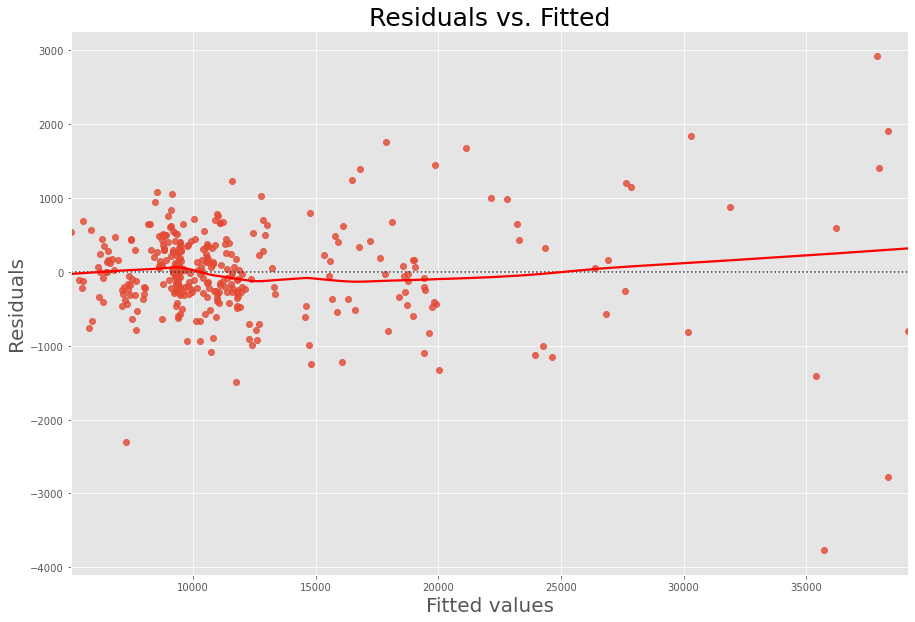

In [132]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.residplot(model6_fitted_y_values, df_btc_CCC_dummies['Close'], lowess = True, line_kws = {'color': 'red'})
ax.set_title('Residuals vs. Fitted', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('Residuals', fontsize = 20)

Text(0, 0.5, 'Standardized residuals')

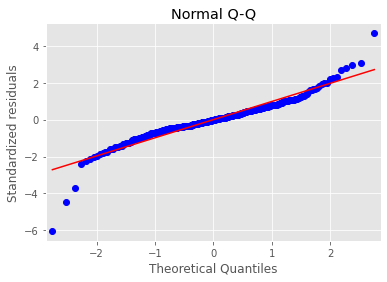

In [133]:
QQ = sgg.ProbPlot(model6_norm_resids)
qq_plot = QQ.qqplot(line = 's')
qq_plot.axes[0].set_title('Normal Q-Q')
qq_plot.axes[0].set_ylabel('Standardized residuals')

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'sqrt(abs(Standardized residuals))')

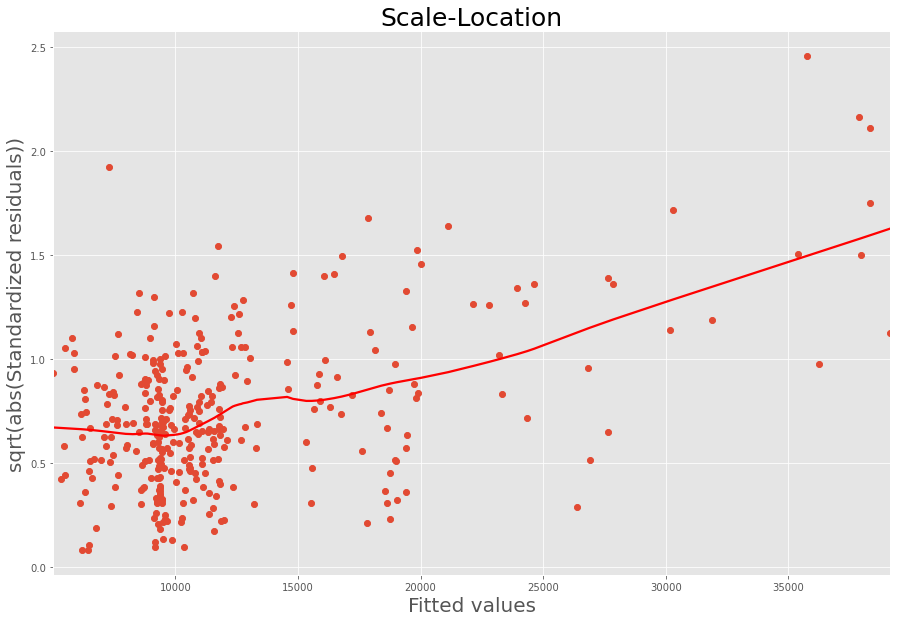

In [134]:
fig, ax = plt.subplots(figsize = (15, 10))
plt_scatter = plt.scatter(model6_fitted_y_values, model6_norm_resids_abs_sqrt)
plt_scale_location = sns.regplot(model6_fitted_y_values, model6_norm_resids_abs_sqrt, lowess = True, 
                                 line_kws = {'color': 'red'})
ax.set_title('Scale-Location', fontsize = 25)
ax.set_xlabel('Fitted values', fontsize = 20)
ax.set_ylabel('sqrt(abs(Standardized residuals))', fontsize = 20)
#constant variation and randomness of errors/residuals

/home/jonathon/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Standardized Residuals')

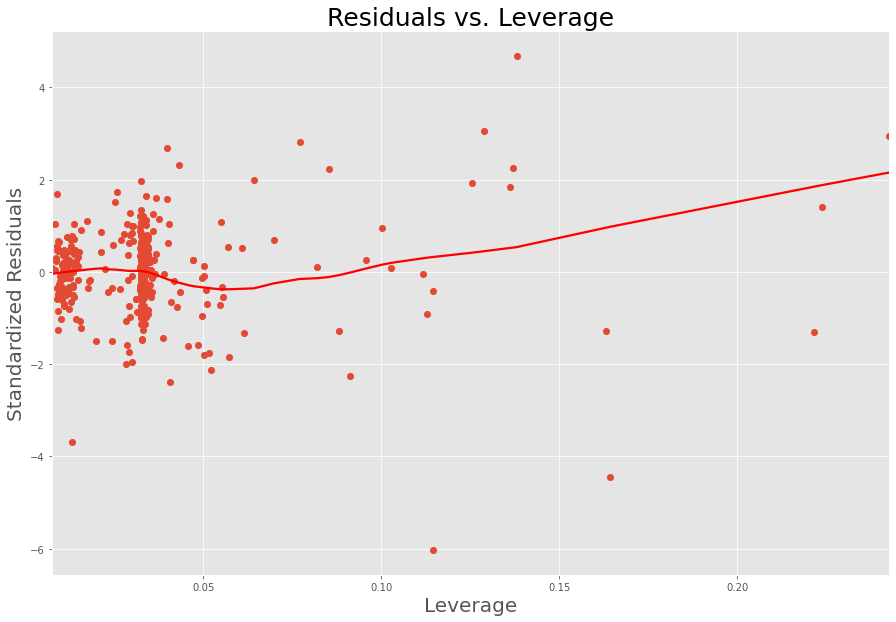

In [135]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(model6_lev, model6_norm_resids)
sns.regplot(model6_lev, model6_norm_resids, lowess=True, line_kws={'color': 'red'})
ax.set_title('Residuals vs. Leverage', fontsize = 25)
ax.set_xlabel('Leverage', fontsize = 20)
ax.set_ylabel('Standardized Residuals', fontsize = 20)

In [136]:
y_pred_6 = model6.predict(df_btc_CCC_dummies[['Relative_Time', 'Feb', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Jan', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_ETH_lag_1']])

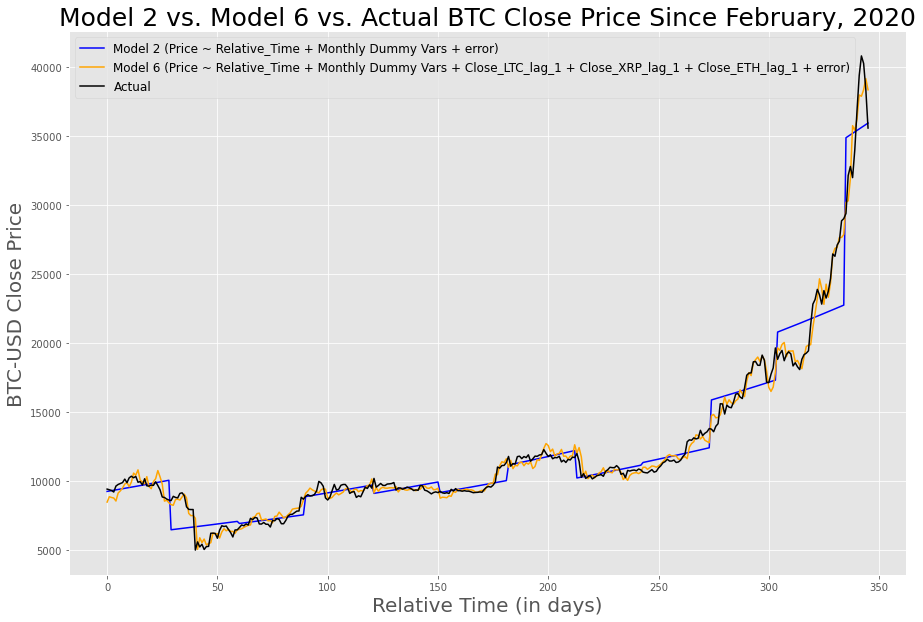

In [137]:
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_baseline_dummies['Relative_Time']
actual = df_btc_baseline['Close']
ax.plot(t, e**y_pred_2, color = 'blue', label = 'Model 2 (Price ~ Relative_Time + Monthly Dummy Vars + error)')
ax.plot(t, y_pred_6, color = 'orange', label = 'Model 6 (Price ~ Relative_Time + Monthly Dummy Vars + Close_LTC_lag_1 + Close_XRP_lag_1 + Close_ETH_lag_1 + error)')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('Model 2 vs. Model 6 vs. Actual BTC Close Price Since February, 2020', fontsize = 25)
ax.set_xlabel('Relative Time (in days)', fontsize = 20)
ax.set_ylabel('BTC-USD Close Price', fontsize = 20)
plt.legend(fontsize = 12)

In [138]:
#instead, use 3-day MA as baseline model
df_btc_CCC_dummies['3_day_MA'] = float('NaN')

In [139]:
for i in range(3,len(df_btc_CCC_dummies)):
    df_btc_CCC_dummies['3_day_MA'][i] = df_btc_CCC_dummies['Close'][i-3:i].mean()

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
df_btc_CCC_dummies.columns.values

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Volume_Price', '10_Day_VWAP', 'Daily_Return', 'Biweekly_RS',
       'Biweekly_RSI', '12_day_EMA', '26_day_EMA', 'MACD', 'Signal',
       'Trend_Analysis_Close', 'Relative_Time', 'Month', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Jan', 'Close_LTC_lag_1', 'Close_ETH_lag_1', 'Close_BNB_lag_1',
       'Close_BCH_lag_1', 'Close_XRP_lag_1', '3_day_MA'], dtype=object)

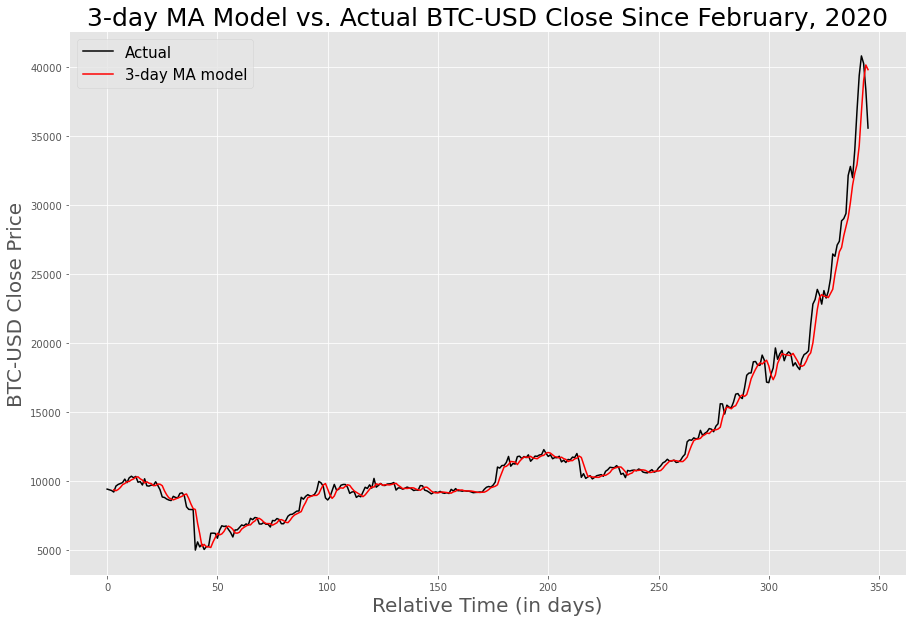

In [141]:
#plot 3-day MA vs. Actual
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_CCC_dummies['Relative_Time']
actual = df_btc_CCC_dummies['Close']
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.plot(t[3:], df_btc_CCC_dummies['3_day_MA'][3:], color = 'red', label = '3-day MA model')
ax.set_title('3-day MA Model vs. Actual BTC-USD Close Since February, 2020', fontsize = 25)
ax.set_xlabel('Relative Time (in days)', fontsize = 20)
ax.set_ylabel('BTC-USD Close Price', fontsize = 20)
plt.legend(fontsize = 15)

In [142]:
#calculate RMSE of 3-day MA model and other model...

In [143]:
df_btc_CCC_dummies[['pred_LR', 'Error_MA', 'Error_LR', 'Error_MA_sqr', 'Error_LR_sqr']] = float('NaN')

In [144]:
df_btc_CCC_dummies['Error_MA'] = df_btc_CCC_dummies['3_day_MA'] - df_btc_CCC_dummies['Close']

In [145]:
df_btc_CCC_dummies['Error_MA_sqr'] = df_btc_CCC_dummies['Error_MA']**2

In [146]:
for i in range(len(df_btc_CCC_dummies)):
    df_btc_CCC_dummies['pred_LR'][i] = y_pred_6[i]

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [147]:
df_btc_CCC_dummies['Error_LR'] = df_btc_CCC_dummies['pred_LR'] - df_btc_CCC_dummies['Close']

In [148]:
df_btc_CCC_dummies['Error_LR_sqr'] = df_btc_CCC_dummies['Error_LR']**2

In [149]:
RMSE_MA = np.sqrt(df_btc_CCC_dummies['Error_MA_sqr'].mean())
RMSE_MA

764.5361963928427

In [150]:
RMSE_LR = np.sqrt(df_btc_CCC_dummies['Error_LR_sqr'].mean())
RMSE_LR

613.9617929382819

In [151]:
#RMSE_LR < RMSE_MA, therefore multiple linear regressive model,
#i.e. Model 6, is an improvement on baseline model

In [152]:
#ARIMA and other time-series models to implement...

In [153]:
#MA, AR, then ARIMA modeling in that order...

In [154]:
#first, detrend and deseasonalize the data...Model_2 is a pure trend/seasonal model of BTC price, 
#therefore subtract this model' predictions from actual prices
df_btc_CCC_dummies['Close_Detrended_Deseasonalized'] = df_btc_CCC_dummies['Close'] - e**y_pred_2

<AxesSubplot:title={'center':'BTC-USD Detrended/Deseasonalized Price Since February, 2020'}, xlabel='Relative_Time'>

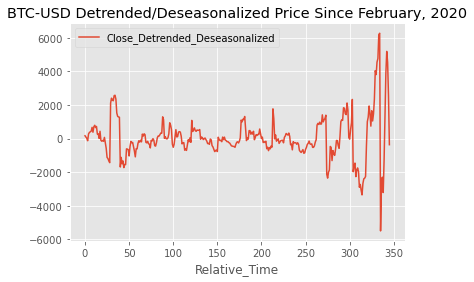

In [155]:
df_btc_CCC_dummies.plot('Relative_Time', 'Close_Detrended_Deseasonalized', title = 'BTC-USD Detrended/Deseasonalized Price Since February, 2020')

In [156]:
#perform Box-Cox Transformation on Close for BTC to remove variance issue from decomposition process

In [157]:
BTC_transformed, lmda = stats.boxcox(df_btc_CCC_dummies['Close'])
print("Best lambda for transformation:", lmda)

Best lambda for transformation: -0.8187799007109664


In [158]:
BTC_t_series = pd.Series(data=BTC_transformed,
                              index=df_btc_CCC_dummies['Relative_Time'].values)
BTC_t_series.reset_index(inplace = True, drop = True)

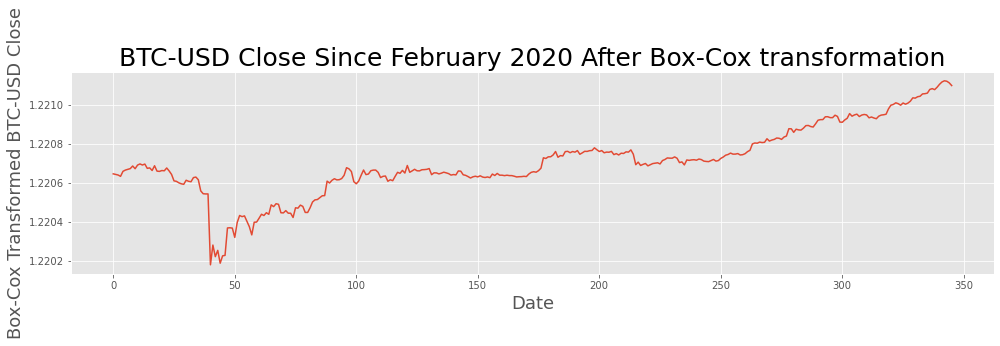

In [159]:
fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(BTC_t_series.index, BTC_t_series.values)
ax.set_title("BTC-USD Close Since February 2020 After Box-Cox transformation", fontsize = 25)
ax.set_ylabel('Box-Cox Transformed BTC-USD Close', fontsize = 18)
ax.set_xlabel('Date', fontsize = 18)
fig.tight_layout()
#less of steep exponential increase on 
#Box-Cox transformed BTC-USD

In [160]:
df_btc_CCC_dummies['Close_transformed'] = BTC_transformed

In [161]:
#Now detrend and deseasonalize BTC_transformed
model_transformed = ols('Close_transformed ~ Relative_Time + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + Jan', data = df_btc_CCC_dummies).fit()
model_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Close_transformed   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     295.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.53e-169
Time:                        15:28:45   Log-Likelihood:                 2925.1
No. Observations:                 346   AIC:                            -5824.
Df Residuals:                     333   BIC:                            -5774.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1267   5.44e-05   2.07e+04      0.000       1.127       1.127
Relative_Time   8.35e-07   3.26e-07      2.563      0.011    1.94e-07    1.48e-06
Feb               0.0941   5.83e-05   1613.819      0.000       0.094       0.094
Mar               0.0940   5.07e-05   1854.369      0.000       0.094       0.094
Apr               0.0937    4.1e-05   2283.008      0.000       0.094       0.094
May               0.0937   3.15e-05   2978.451      0.000       0.094       0.094
Jun               0.0939   2.21e-05   4245.974      0.000       0.094       0.094
Jul               0.0939   1.38e-05   6817.082      0.000       0.094       0.094
Aug               0.0938    9.1e-06   1.03e+04      0.000       0.094       0.094
Sep               0.0939   1.34e-05   7014.108      0.000       0.094       0.094
Oct               0.0938   2.18e-05   4302.313      0.000       0.094       0.094
Nov               0.0939   3.11e-05   3022.097      0.000       0.094       0.094
Dec               0.0940   4.07e-05   2309.205      0.000       0.094       0.094
Jan               0.0940   5.04e-05   1865.792      0.000       0.094       0.094
==============================================================================
Omnibus:                       64.631   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              838.770
Skew:                           0.223   Prob(JB):                    7.30e-183
Kurtosis:                      10.615   Cond. No.                     1.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [162]:
df_btc_CCC_dummies['Close_transformed_detrended_deseasonalized'] = model_transformed.predict(df_btc_CCC_dummies[['Relative_Time', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']]) - df_btc_CCC_dummies['Close_transformed']

<AxesSubplot:xlabel='Relative_Time'>

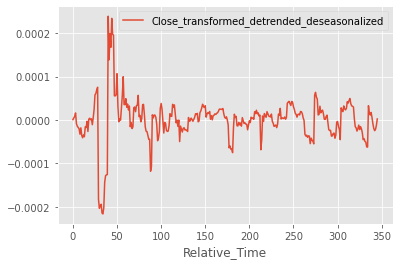

In [163]:
df_btc_CCC_dummies.plot('Relative_Time', 'Close_transformed_detrended_deseasonalized')

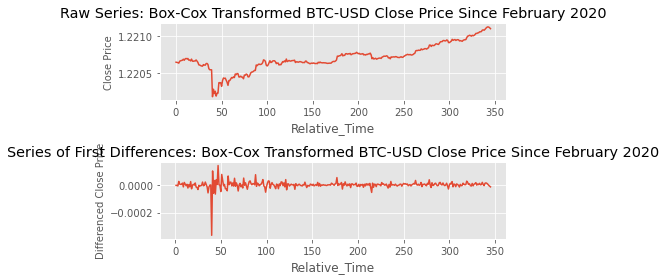

In [164]:
#still variance issue!
#try difference series to detrend BTC-USD Close Price
fig, axs = plt.subplots(2, 1)
plot_series_and_difference(axs, BTC_t_series, 'Box-Cox Transformed BTC-USD Close Price Since February 2020')

In [165]:
BTC_orig_t_series = pd.Series(data=df_btc_CCC_dummies['Close'].values,
                              index=df_btc_CCC_dummies['Relative_Time'].values)
BTC_orig_t_series.reset_index(inplace = True, drop = True)

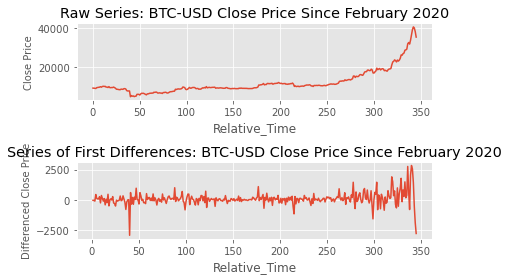

In [166]:
fig, axs = plt.subplots(2, 1)
plot_series_and_difference(axs, BTC_orig_t_series, 'BTC-USD Close Price Since February 2020')

Variance still isn't stable, but much better than just differencing original values: try taking log of BTC-USD Close price, then applying Box-Cox transformation and differencing, compare and choose best result!

In [167]:
df_btc_CCC_dummies['log_10(Close)'] = np.log10(df_btc_CCC_dummies['Close'])

<AxesSubplot:xlabel='Relative_Time'>

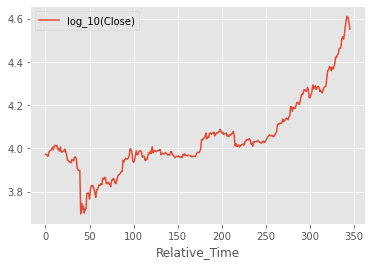

In [168]:
df_btc_CCC_dummies.plot('Relative_Time', 'log_10(Close)')

In [169]:
df_btc_CCC_dummies['ln(Close)'] = np.log(df_btc_CCC_dummies['Close'])

<AxesSubplot:xlabel='Relative_Time'>

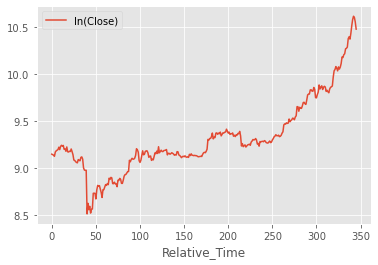

In [170]:
df_btc_CCC_dummies.plot('Relative_Time', 'ln(Close)')

In [171]:
#cannot remove minor variance issue even with log10() or ln() 
#of Close as is evident by visualizations, 
#so the corresponding time segment of the prediction 
#with high variance will be inaccurate...

In [172]:
#ADF p-value << 0.05!
test = sm.tsa.stattools.adfuller(BTC_t_series.diff()[1:])
print("ADF p-value for Differenced Box-Cox series: {0}".format(test[1]))

ADF p-value for Differenced Box-Cox series: 3.1165115581662225e-11


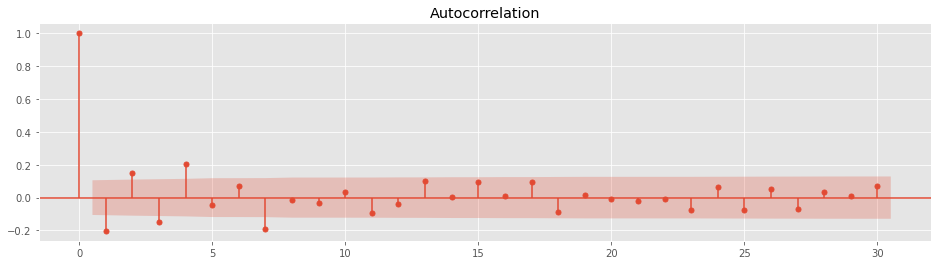

In [173]:
fig, ax = plt.subplots(figsize=(16, 4))
_ = sm.graphics.tsa.plot_acf(BTC_t_series.diff()[1:], lags=30, ax=ax)

In [174]:
#MA modeling, 4 additional lags is statistically significant based on ACF plot
model_ma = ARIMA(BTC_t_series, order=(0, 1, 4))
model_ma.fit()

/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [175]:
pred_ma = model_ma.predict(BTC_t_series)

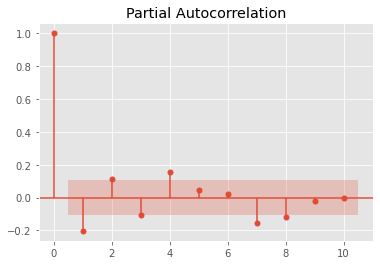

In [176]:
_ = sm.graphics.tsa.plot_pacf(BTC_t_series.diff()[1:], lags=10)

In [177]:
#AR modeling, 4 additional lags is statistically significant based on PACF plot
model_ar = ARIMA(BTC_t_series, order=(4, 1, 0))
model_ar.fit()

/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [178]:
pred_ar = model_ar.predict(BTC_t_series)

In [179]:
#ARIMA modeling
model_arima = ARIMA(BTC_t_series, order = (4, 1, 4))
model_arima.fit()

/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

 

In [180]:
pred_arima = model_arima.predict(BTC_t_series)

In [181]:
#ARIMA model with auto_arima function under pmdarima library
model_auto_arima = pm.auto_arima(BTC_t_series, seasonal=False)

In [182]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  346
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3147.625
Date:                Fri, 15 Jan 2021   AIC                          -6289.250
Time:                        15:29:01   BIC                          -6277.719
Sample:                             0   HQIC                         -6284.658
                                - 346                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8258   1.83e-19  -4.52e+18      0.000      -0.826      -0.826
ma.L1          0.6605   1.22e-19   5.43e+18      0.000       0.661       0.661
sigma2      4.824e-10   4.24e-11     11.380      0.000    3.99e-10    5.66e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            159183.85
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -7.26
Prob(H) (two-sided):                  0.00   Kurtosis:                       107.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [183]:
# make forecast
forecasts = model_auto_arima.predict(1)  
#predict N = 1 steps into the future

/home/jonathon/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


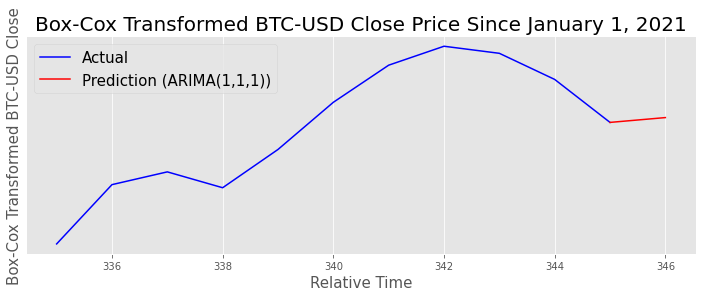

In [184]:
# Visualize the forecast
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(BTC_t_series.index.values[335:], BTC_t_series.values[335:], c='blue', label = 'Actual')
ax.plot([345, 346], [BTC_t_series[345], forecasts], c='red', label = 'Prediction (ARIMA(1,1,1))')
ax.set_title('Box-Cox Transformed BTC-USD Close Price Since January 1, 2021', fontsize = 20)
ax.set_yticks([])
ax.set_ylabel('Box-Cox Transformed BTC-USD Close', fontsize = 15)
ax.set_xlabel('Relative Time', fontsize = 15)
ax.legend(fontsize = 15)

In [185]:
#grid search via auto_arima for best seasonal ARIMA model
#over ALL Box-Cox Transformed BTC-USD Close Prices

In [186]:
BTC_transformed_all, lmda_all = stats.boxcox(df_btc['Close'])
print("Best lambda for transformation:", lmda_all)

Best lambda for transformation: 0.15410178888217624


In [187]:
BTC_t_series_all = pd.Series(data=BTC_transformed_all,
                              index=np.arange(len(df_btc)))

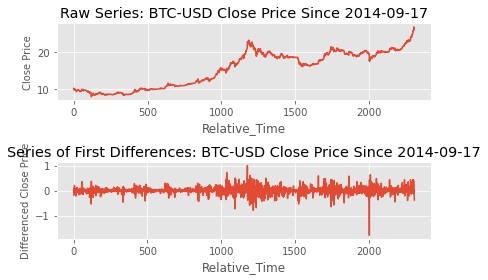

In [188]:
fig, axs = plt.subplots(2, 1)
init_date_all = str(df_btc.index.values[0])[:10]
plot_series_and_difference(axs, BTC_t_series_all, f'BTC-USD Close Price Since {init_date_all}')

In [189]:
#ADF p-value << 0.05!
test = sm.tsa.stattools.adfuller(BTC_t_series_all.diff()[1:])
print("ADF p-value for Differenced Box-Cox series: {0}".format(test[1]))

ADF p-value for Differenced Box-Cox series: 0.0


In [438]:
models_arima_all = []
for i in range(1,31):
    models_arima_all.append(pm.auto_arima(BTC_t_series_all, seasonal = True, m = i))
for model in models_arima_all:
    print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2309
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1254.545
Date:                Fri, 15 Jan 2021   AIC                          -2505.090
Time:                        11:56:43   BIC                          -2493.602
Sample:                             0   HQIC                         -2500.903
                               - 2309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.003      2.316      0.021       0.001       0.013
sigma2         0.0197      0.000    100.730      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.04   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2309
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1254.545
Date:                Fri, 15 Jan 2021   AIC                          -2505.090
Time:                        11:56:43   BIC                          -2493.602
Sample:                             0   HQIC                         -2500.903
                               - 2309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.003      2.316      0.021       0.001       0.013
sigma2         0.0197      0.000    100.730      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.04   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2309
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1254.545
Date:                Fri, 15 Jan 2021   AIC                          -2505.090
Time:                        11:56:43   BIC                          -2493.602
Sample:                             0   HQIC                         -2500.903
                               - 2309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.003      2.316      0.021       0.001       0.013
sigma2         0.0197      0.000    100.730      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.04   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2309
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1254.545
Date:                Fri, 15 Jan 2021   AIC                          -2505.090
Time:                        11:56:44   BIC                          -2493.602
Sample:                             0   HQIC                         -2500.903
                               - 2309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.003      2.316      0.021       0.001       0.013
sigma2         0.0197      0.000    100.730      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [190]:
#grid search via auto_arima for best seasonal ARIMA model
#over just past year (since 01FEB20)

In [440]:
models_arima = []
for i in range(1,31):
    models_arima.append(pm.auto_arima(BTC_t_series, seasonal = True, m = i))
for model in models_arima:
    print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  346
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3147.625
Date:                Fri, 15 Jan 2021   AIC                          -6289.250
Time:                        13:05:13   BIC                          -6277.719
Sample:                             0   HQIC                         -6284.658
                                - 346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8258   1.83e-19  -4.52e+18      0.000      -0.826      -0.826
ma.L1          0.6605   1.22e-19   5.43e+18      0.000       0.661       0.661
sigma2      4.824e-10   4.24e-11     11.380      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  346
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3147.625
Date:                Fri, 15 Jan 2021   AIC                          -6289.250
Time:                        13:05:13   BIC                          -6277.719
Sample:                             0   HQIC                         -6284.658
                                - 346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8258   1.83e-19  -4.52e+18      0.000      -0.826      -0.826
ma.L1          0.6605   1.22e-19   5.43e+18      0.000       0.661       0.661
sigma2      4.824e-10   4.24e-11     11.380      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  346
Model:               SARIMAX(4, 1, 0)   Log Likelihood                3150.268
Date:                Fri, 15 Jan 2021   AIC                          -6288.536
Time:                        13:05:13   BIC                          -6265.475
Sample:                             0   HQIC                         -6279.352
                                - 346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.246e-06   1.93e-06      0.646      0.518   -2.53e-06    5.03e-06
ar.L1         -0.1516   1.15e-11  -1.32e+10      0.000      -0.152      -0.152
ar.L2          0.0781   1.12e-11   6.95e+09      0.0

In [191]:
#all data:
#best model via "AIC" and "log likelihood" 
#SARIMAX(order = (0,1,0), seasonal_order = (2,0,0,10))

#past year's data
#best model via "AIC": 
#SARIMAX(order = (1,1,1), seasonal_order = (1,0,[],7))
#best model via "Log Likelihood": 
#SARIMAX(order = (4,1,0))

In [192]:
best_ARIMA_model_all = SARIMAX(BTC_t_series_all, order = (0,1,0), seasonal_order = (2,0,0,10)).fit()

In [193]:
log_likelihood_model = SARIMAX(BTC_t_series, order = (4, 1, 0)).fit()

/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [194]:
weekly_model = SARIMAX(BTC_t_series, order = (1, 1, 1), seasonal_order = (1, 0, [], 7)).fit()

/home/jonathon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


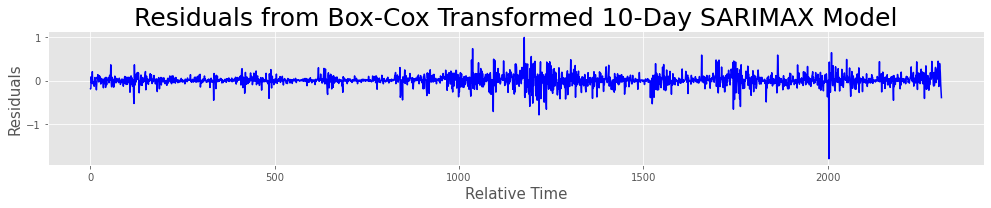

In [195]:
fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(best_ARIMA_model_all.resid.index[1:], best_ARIMA_model_all.resid[1:], color = 'blue')
ax.set_title("Residuals from Box-Cox Transformed 10-Day SARIMAX Model", fontsize = 25)
ax.set_xlabel('Relative Time', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
plt.tight_layout()

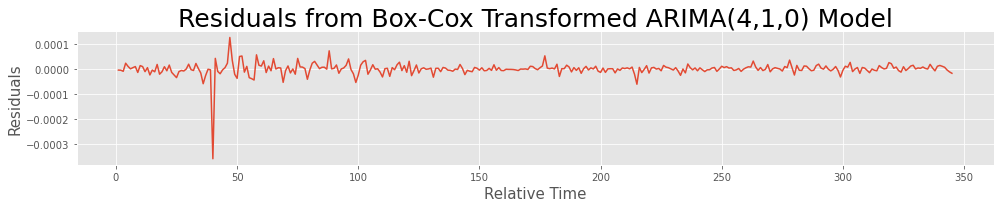

In [196]:
fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(log_likelihood_model.resid.index[1:], log_likelihood_model.resid[1:])
ax.set_title("Residuals from Box-Cox Transformed ARIMA(4,1,0) Model", fontsize = 25)
ax.set_xlabel('Relative Time', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
plt.tight_layout()

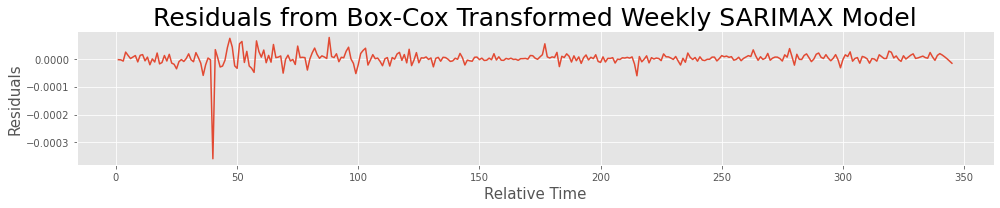

In [197]:
fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(weekly_model.resid.index[1:], weekly_model.resid[1:])
ax.set_title("Residuals from Box-Cox Transformed Weekly SARIMAX Model", fontsize = 25)
ax.set_xlabel('Relative Time', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
plt.tight_layout()

In [198]:
#residuals = actual - predicted, 
#therefore predicted = actual - residuals

In [199]:
df_btc['ARIMA_10_Day_Seasonal_pred'] = float('NaN')

In [200]:
for i in range(1,len(df_btc)):
    df_btc['ARIMA_10_Day_Seasonal_pred'][i] = BTC_transformed_all[i] - best_ARIMA_model_all.resid[i]

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
df_btc['ARIMA_pred_untransf_all'] = float('NaN')

In [202]:
for i in range(len(df_btc)):
    df_btc['ARIMA_pred_untransf_all'][i] = inv_boxcox(df_btc['ARIMA_10_Day_Seasonal_pred'][i], lmda_all)

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
df_btc[['Error_ARIMA_all', 'Error_ARIMA_all_sqr']] = float('NaN')

In [204]:
for i in range(1, len(df_btc)):
    df_btc['Error_ARIMA_all'][i] = df_btc['Close'][i] - df_btc['ARIMA_pred_untransf_all'][i]
    df_btc['Error_ARIMA_all_sqr'][i] = df_btc['Error_ARIMA_all'][i]**2

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [205]:
RMSE_ARIMA_all = np.sqrt(df_btc[df_btc.index >= '2020-02-01']['Error_ARIMA_all_sqr'].mean())

In [206]:
RMSE_ARIMA_all

538.2395700673703

In [207]:
df_btc_CCC_dummies[['ARIMA_weekly_pred', 'ARIMA_pred']] = float('NaN')

In [208]:
for i in range(1,len(df_btc_CCC_dummies)):
    df_btc_CCC_dummies['ARIMA_weekly_pred'][i] = df_btc_CCC_dummies['Close_transformed'][i] - weekly_model.resid[i]
    df_btc_CCC_dummies['ARIMA_pred'][i] = df_btc_CCC_dummies['Close_transformed'][i] - log_likelihood_model.resid[i]

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
df_btc_CCC_dummies[['ARIMA_weekly_pred_untransf', 'ARIMA_pred_untransf']] = float('NaN')

In [210]:
for i in range(1, len(df_btc_CCC_dummies)):
    df_btc_CCC_dummies['ARIMA_weekly_pred_untransf'][i] = inv_boxcox(df_btc_CCC_dummies['ARIMA_weekly_pred'][i], lmda)
    df_btc_CCC_dummies['ARIMA_pred_untransf'][i] = inv_boxcox(df_btc_CCC_dummies['ARIMA_pred'][i], lmda)

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
df_btc_CCC_dummies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346 entries, 2020-02-01 to 2021-01-11
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Open                                        346 non-null    float64
 1   High                                        346 non-null    float64
 2   Low                                         346 non-null    float64
 3   Close                                       346 non-null    float64
 4   Adj Close                                   346 non-null    float64
 5   Volume                                      346 non-null    float64
 6   Volume_Price                                346 non-null    float64
 7   10_Day_VWAP                                 346 non-null    float64
 8   Daily_Return                                346 non-null    float64
 9   Biweekly_RS                                 346 non-null    float64


In [212]:
df_btc_CCC_dummies[['Error_ARIMA_weekly', 'Error_ARIMA', 'Error_ARIMA_weekly_sqr', 'Error_ARIMA_sqr']] = float('NaN')

In [213]:
for i in range(1, len(df_btc_CCC_dummies)):
    df_btc_CCC_dummies['Error_ARIMA_weekly'][i] = df_btc_CCC_dummies['Close'][i] - df_btc_CCC_dummies['ARIMA_weekly_pred_untransf'][i]
    df_btc_CCC_dummies['Error_ARIMA'][i] = df_btc_CCC_dummies['Close'][i] - df_btc_CCC_dummies['ARIMA_pred_untransf'][i]
    df_btc_CCC_dummies['Error_ARIMA_weekly_sqr'][i] = df_btc_CCC_dummies['Error_ARIMA_weekly'][i]**2
    df_btc_CCC_dummies['Error_ARIMA_sqr'][i] = df_btc_CCC_dummies['Error_ARIMA'][i]**2

/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jonathon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [214]:
RMSE_ARIMA_weekly = np.sqrt(df_btc_CCC_dummies['Error_ARIMA_weekly_sqr'][1:].mean())

In [215]:
RMSE_ARIMA = np.sqrt(df_btc_CCC_dummies['Error_ARIMA_sqr'][1:].mean())

In [216]:
f'RMSE_MA: {RMSE_MA}, RMSE_LR: {RMSE_LR}, RMSE_ARIMA_weekly" {RMSE_ARIMA_weekly}, RMSE_ARIMA: {RMSE_ARIMA}'

'RMSE_MA: 764.5361963928427, RMSE_LR: 613.9617929382819, RMSE_ARIMA_weekly" 586.8072214852102, RMSE_ARIMA: 569.1411461165933'

In [217]:
sd_ARIMA_all = np.sqrt(np.sum(df_btc[df_btc.index >= '2020-02-01']['Error_ARIMA_all_sqr'])/(len(df_btc[df_btc.index >= '2020-02-01'])-1))

In [218]:
sd_ARIMA_all * 2

1078.0381259481621

In [219]:
#RMSE_ARIMA_all is lowest RMSE, so best_model_ARIMA_all model is best model thus far!

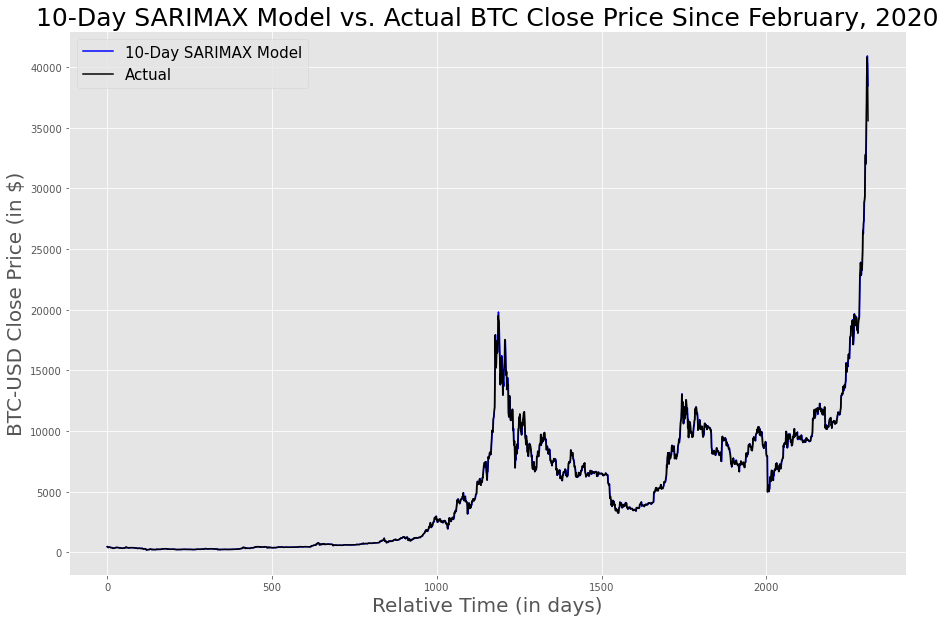

In [220]:
#plot best ARIMA model against Actual over all of Bitcoin's lifetime
fig, ax = plt.subplots(figsize = (15, 10))
t = np.arange(len(df_btc))
actual = df_btc['Close']
ax.plot(t[1:], df_btc['ARIMA_pred_untransf_all'][1:], color = 'blue', label = '10-Day SARIMAX Model')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('10-Day SARIMAX Model vs. Actual BTC Close Price Since February, 2020', fontsize = 25)
ax.set_xlabel('Relative Time (in days)', fontsize = 20)
ax.set_ylabel('BTC-USD Close Price (in $)', fontsize = 20)
plt.legend(fontsize = 15)

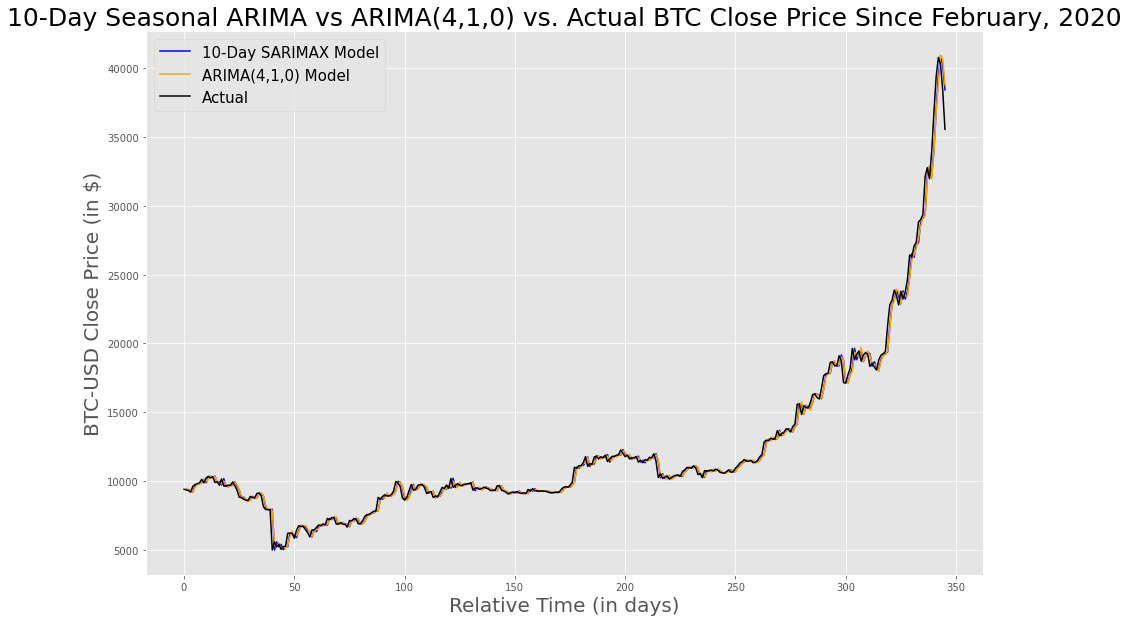

In [224]:
#plot ARIMA models against Actual
fig, ax = plt.subplots(figsize = (15, 10))
t = df_btc_CCC_dummies['Relative_Time']
actual = df_btc_CCC_dummies['Close']
ax.plot(t[1:], df_btc[df_btc.index > '2020-02-01']['ARIMA_pred_untransf_all'], color = 'blue', label = '10-Day SARIMAX Model')
ax.plot(t[1:], df_btc_CCC_dummies['ARIMA_pred_untransf'][1:], color = 'orange', label = 'ARIMA(4,1,0) Model')
ax.plot(t, actual, color = 'black', label = 'Actual')
ax.set_title('10-Day Seasonal ARIMA vs ARIMA(4,1,0) vs. Actual BTC Close Price Since February, 2020', fontsize = 25)
ax.set_xlabel('Relative Time (in days)', fontsize = 20)
ax.set_ylabel('BTC-USD Close Price (in $)', fontsize = 20)
plt.legend(fontsize = 15)

In [ ]:
pred_weekly = weekly_model.predict(346).values

In [ ]:
pred_log_likelihood = log_likelihood_model.predict(346).values

In [ ]:
pred_weekly_untransf = inv_boxcox(pred_weekly, lmda)[0]

In [ ]:
pred_ARIMA_untransf = inv_boxcox(pred_log_likelihood, lmda)[0]

In [ ]:
f'Weekly SARIMAX next day prediction: ${pred_weekly_untransf:.2f}, ARIMA(4,1,0) next day prediction: ${pred_ARIMA_untransf:.2f}.'

In [ ]:
df_pred_model6 = pd.DataFrame(data = {'Relative_Time': 339, 'Feb': 0, 'Jun': 0, 'Aug': 0, 'Sep': 0, 'Oct': 0, 'Nov': 0, 'Jan': 1, 'Close_LTC_lag_1': df_btc_CCC_dummies['Close_LTC_lag_1'][-1], 'Close_XRP_lag_1': df_btc_CCC_dummies['Close_XRP_lag_1'][-1], 'Close_ETH_lag_1': df_btc_CCC_dummies['Close_ETH_lag_1'][-1]}, index = [0]) 

In [ ]:
df_pred_model6

In [ ]:
model6_pred = model6.predict(df_pred_model6[['Relative_Time', 'Feb', 'Jun', 'Aug', 'Sep', 'Oct', 'Nov', 'Jan', 'Close_LTC_lag_1', 'Close_XRP_lag_1', 'Close_ETH_lag_1']]).values[0]

In [ ]:
MA_pred = df_btc_CCC_dummies['Close'][-3:].mean()

In [ ]:
f'3-day MA next day prediction: ${MA_pred:.2f}, Multiple Linear Regressive Model next day prediction: ${model6_pred:.2f}.'

In [ ]:
best_ARIMA_model_pred = inv_boxcox(best_ARIMA_model_all.predict(len(df_btc)).values[0], lmda_all)

In [ ]:
f'Best ARIMA model\'s next day prediction: ${best_ARIMA_model_pred:.2f}.'

In [ ]:
'BTC-USD Actual Close Price on next day (12JAN21): $33922.96'

In [ ]:
#incorporate coin ranking and macroeconomic factors
#into LSTM model in future after project?

In [ ]:
model_lstm = keras.Sequential()

In [ ]:
model_lstm.add(keras.layers.LSTM(32, input_shape = (100, 1), return_sequences = True))
model_lstm.add(keras.layers.LSTM(32, return_sequences = False))
model_lstm.add(keras.layers.Dense(1, activation = 'linear'))
model_lstm.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
model_lstm.summary()

In [ ]:
x_input_lstm, y_input_lstm = windowize_data(df_btc['Close'].values, 100)

In [ ]:
x_input_lstm.shape

In [ ]:
y_input_lstm.shape

In [ ]:
f'Goal is to produce LSTM model with MSE < MSE_ARIMA = {RMSE_ARIMA**2}.'

In [ ]:
model_lstm.fit(x_input_lstm, y_input_lstm, batch_size = 32, epochs = 10)

In [ ]:
#will need more sufficient data to fit an LSTM model to, 
#i.e. much more granular time-series data for BTC-USD prices
#to avoid running thousands of epochs

In [ ]:
# we set which pair we want to retrieve data for
pair = "BTC/USD"
fetch_daily_data(symbol=pair)

In [ ]:
df_btc_minute_gran = pd.read_csv('Coinbase_BTCUSD_dailydata.csv')

In [ ]:
df_btc_minute_gran.head(10)

In [ ]:
#the hope was in the Coinbase url, i.e. 86400, 
#which is equal to 60 * 60 * 24 = 86400, 
#would populate data with granularity in the minutes, 
#however this did not occur, 
#LSTM model will only be effective with more granular data, 
#so next steps following this project would be to 
#locate more granular pricing data of BTC-USD

In [ ]:
BTC_assist_tool(df_btc, best_ARIMA_model_all, lmda_all)

In [ ]:
#compare actual to predicted price by calculating error

In [ ]:
BTC_actual = 33922.96

In [ ]:
error_MA = np.abs(MA_pred - BTC_actual)/BTC_actual

In [ ]:
f'Error of MA prediction is {error_MA * 100}%.'

In [ ]:
error_best_ARIMA_model = np.abs(BTC_actual - best_ARIMA_model_pred)/BTC_actual

In [ ]:
f'Error of best ARIMA model\'s prediction is {error_best_ARIMA_model * 100}%.'